# EI_VOLATILITY

Imports:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import yfinance as yf
import pandas as pd
from fbm import FBM
from scipy.stats import linregress
import scipy.ndimage
import statsmodels.api as sma
import statsmodels.tsa.arima_process as smt
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF
import powerlaw as pl
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from arch import arch_model


plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 13

## I.1) Estimatation of volatility using range-based estimators

Downloading the data from Yahoo Finance

In [3]:
ticker_symbol = "SPY" 

data = yf.download(ticker_symbol, start="2000-01-01", end="2013-12-31")

data

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2000-01-03  148.250000  148.250000  143.875000  145.437500   93.591148   
2000-01-04  143.531250  144.062500  139.640625  139.750000   89.931122   
2000-01-05  139.937500  141.531250  137.250000  140.000000   90.092018   
2000-01-06  139.625000  141.500000  137.750000  137.750000   88.644112   
2000-01-07  140.312500  145.750000  140.062500  145.750000   93.792213   
...                ...         ...         ...         ...         ...   
2013-12-23  182.449997  182.639999  182.070007  182.529999  151.871735   
2013-12-24  182.539993  183.009995  182.529999  182.929993  152.204590   
2013-12-26  183.339996  183.960007  183.320007  183.860001  152.978394   
2013-12-27  184.100006  184.179993  183.660004  183.850006  152.970062   
2013-12-30  183.869995  184.020004  183.580002  183.820007  152.945068   

              Volume  
Date                  
2000-01-03   8164300  
2000-01-04   8089800  
2000-01-05  12177900  
2000-01-06   6227200  
2000-01-07   8066500  
...              ...  
2013-12-23  85598000  
2013-12-24  45368800  
2013-12-26  63365000  
2013-12-27  61814000  
2013-12-30  56857000  

[3520 rows x 6 columns]

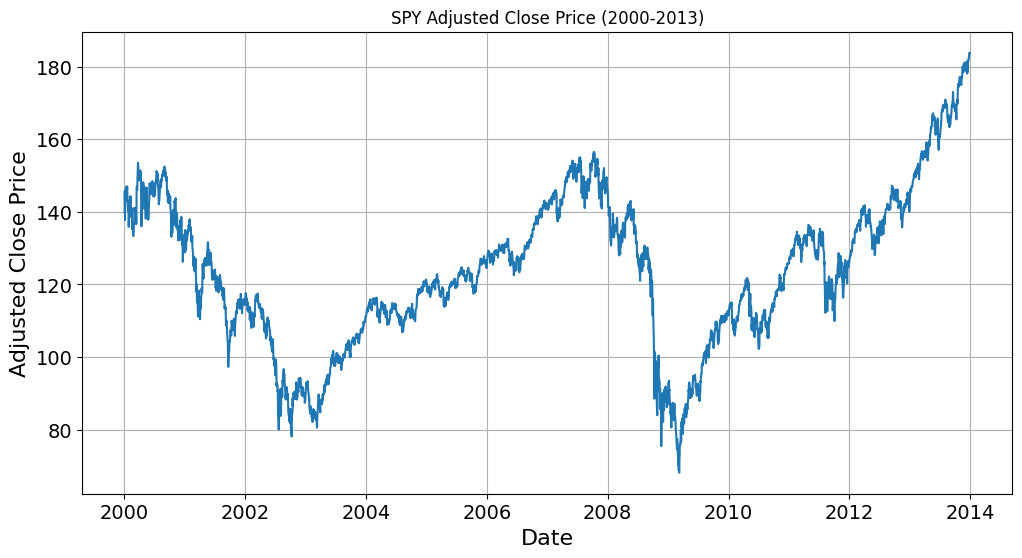

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('SPY Adjusted Close Price (2000-2013)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.show()

Extracting the real data

In [5]:
volatility = pd.read_csv('RealizedVarianceData.csv')
volatility

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3744\2941155377.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,2

Unnamed: 0.1 Unnamed: 0 Realized Variance (5-minute)  \
0                0     DateID                      SPX2.rv   
1                1   20000103         0.000157239596459558   
2                2   20000104         0.000298147448739244   
3                3   20000105         0.000307225852905134   
4                4   20000106         0.000136237904617473   
...            ...        ...                          ...   
3653          3653   20131225                          NaN   
3654          3654   20131226                     0.000004   
3655          3655   20131227                     0.000005   
3656          3656   20131230                     0.000003   
3657          3657   20131231                     0.000008   

           Realized Kernel               Return  \
0                  SPX2.rk               SPX2.r   
1     0.000160726642338866  -0.0101036180817431   
2     0.000264396469319473  -0.0392921825644033   
3     0.000304650302935347  0.00174919456727718   
4     0.000148582063339039  0.00106211984850368   
...                    ...                  ...   
3653                   NaN                  NaN   
3654              0.000005             0.003829   
3655              0.000006            -0.000928   
3656              0.000003            -0.000261   
3657              0.000009             0.002791   

     Realized Variance (5-minute using 1-minute subsamples)  \
0                                            SPX2.rv5ss       
1                                   0.00014410167533591       
2                                  0.000219256477223869       
3                                  0.000297788864162233       
4                                  0.000136479949750481       
...                                                 ...       
3653                                                NaN       
3654                                           0.000004       
3655                                           0.000005       
3656                                           0.000003       
3657                                           0.000009       

     Realized Variance (10-minute)  \
0                        SPX2.rv10   
1             0.000175343616941057   
2             0.000399598741726631   
3             0.000257950686631379   
4             0.000108310420121052   
...                            ...   
3653                           NaN   
3654                      0.000004   
3655                      0.000004   
3656                      0.000003   
3657                      0.000009   

     Realized Variance (10-minute using 1-minute subsamples)  \
0                                           SPX2.rv10ss        
1                                   0.00016970470393023        
2                                  0.000246740561211512        
3                                  0.000306705670365806        
4                                  0.000132804570273788        
...                                                 ...        
3653                                                NaN        
3654                                           0.000003        
3655                                           0.000004        
3656                                           0.000003        
3657                                            0.00001        

     Bipower Variation (5-minute)   \
0                         SPX2.bv5   
1             0.000156756760929018   
2             0.000205714859947726   
3             0.000292364730294294   
4             0.000127030281953223   
...                            ...   
3653                           NaN   
3654                      0.000002   
3655                      0.000006   
3656                      0.000003   
3657                      0.000007   

     Bipower Variation (5-minute using 1-minute subsamples)   ...  \
0                                            SPX2.bv5ss       ...   
1                                  0.000142221651656264       ...   
2

Volatility estimators calculation 

In [6]:
#Close-to-close volatility
data['close_to_close'] = np.log(data['Close'] / data['Close'].shift(1))

#Parkinson volatility
data['parkinson'] = np.sqrt((1/4*np.log(2)*(np.log(data['High']/data['Low'])**2)))

#Garman-Klass volatility
data['Graham Klaus'] = np.sqrt((1/2)*(np.log(data['High']/data['Low'])**2) - (2*np.log(2) - 1)*(np.log(data['Close']/data['Open'])**2))

#Rogers-Satchell volatility
data['Roger'] = np.sqrt(np.log(data['High'] / data['Close']) * np.log(data['High'] / data['Open']) + np.log(data['Low'] / data['Close']) * np.log(data['Low'] / data['Open']))

#Yang-Zhang volatility
k= 0.35
data['Yang'] = np.sqrt( np.log(data['Open']/data['Close'].shift(1))**2 + k*(np.log(data['Close']/data['Open'])**2) + (1 - k)*(data['Roger']**2) )

#making sure everything is calculated the right way by counting the number of NaN
print(np.sum(data['Yang'].isna()))
data = data.iloc[1:]
print(np.sum(data['Yang'].isna()))


data

1
0


Open        High         Low       Close   Adj Close  \
Date                                                                     
2000-01-04  143.531250  144.062500  139.640625  139.750000   89.931122   
2000-01-05  139.937500  141.531250  137.250000  140.000000   90.092018   
2000-01-06  139.625000  141.500000  137.750000  137.750000   88.644112   
2000-01-07  140.312500  145.750000  140.062500  145.750000   93.792213   
2000-01-10  146.250000  146.906250  145.031250  146.250000   94.114014   
...                ...         ...         ...         ...         ...   
2013-12-23  182.449997  182.639999  182.070007  182.529999  151.871735   
2013-12-24  182.539993  183.009995  182.529999  182.929993  152.204590   
2013-12-26  183.339996  183.960007  183.320007  183.860001  152.978394   
2013-12-27  184.100006  184.179993  183.660004  183.850006  152.970062   
2013-12-30  183.869995  184.020004  183.580002  183.820007  152.945068   

              Volume  close_to_close  parkinson  Graham Klaus     Roger  \
Date                                                                      
2000-01-04   8089800       -0.039891   0.012977      0.014512  0.011567   
2000-01-05  12177900        0.001787   0.012787      0.021718  0.022536   
2000-01-06   6227200       -0.016202   0.011181      0.017032  0.018929   
2000-01-07   8066500        0.056452   0.016570      0.015289  0.008425   
2000-01-10   5741700        0.003425   0.005347      0.009083  0.009491   
...              ...             ...        ...           ...       ...   
2013-12-23  85598000        0.005328   0.001301      0.002193  0.002426   
2013-12-24  45368800        0.002189   0.001093      0.001300  0.001115   
2013-12-26  63365000        0.005071   0.001451      0.001725  0.001469   
2013-12-27  61814000       -0.000054   0.001177      0.001812  0.001804   
2013-12-30  56857000       -0.000163   0.000997      0.001684  0.001717   

                Yang  
Date                  
2000-01-04  0.022594  
2000-01-05  0.018221  
2000-01-06  0.017437  
2000-01-07  0.029863  
2000-01-10  0.008383  
...              ...  
2013-12-23  0.005273  
2013-12-24  0.001551  
2013-12-26  0.003037  
2013-12-27  0.002112  
2013-12-30  0.001398  

[3519 rows x 11 columns]

We suppressed the first column because some estimators are note defined on the first day. Indeed, they need value from the day before.

Plot of all estimators:

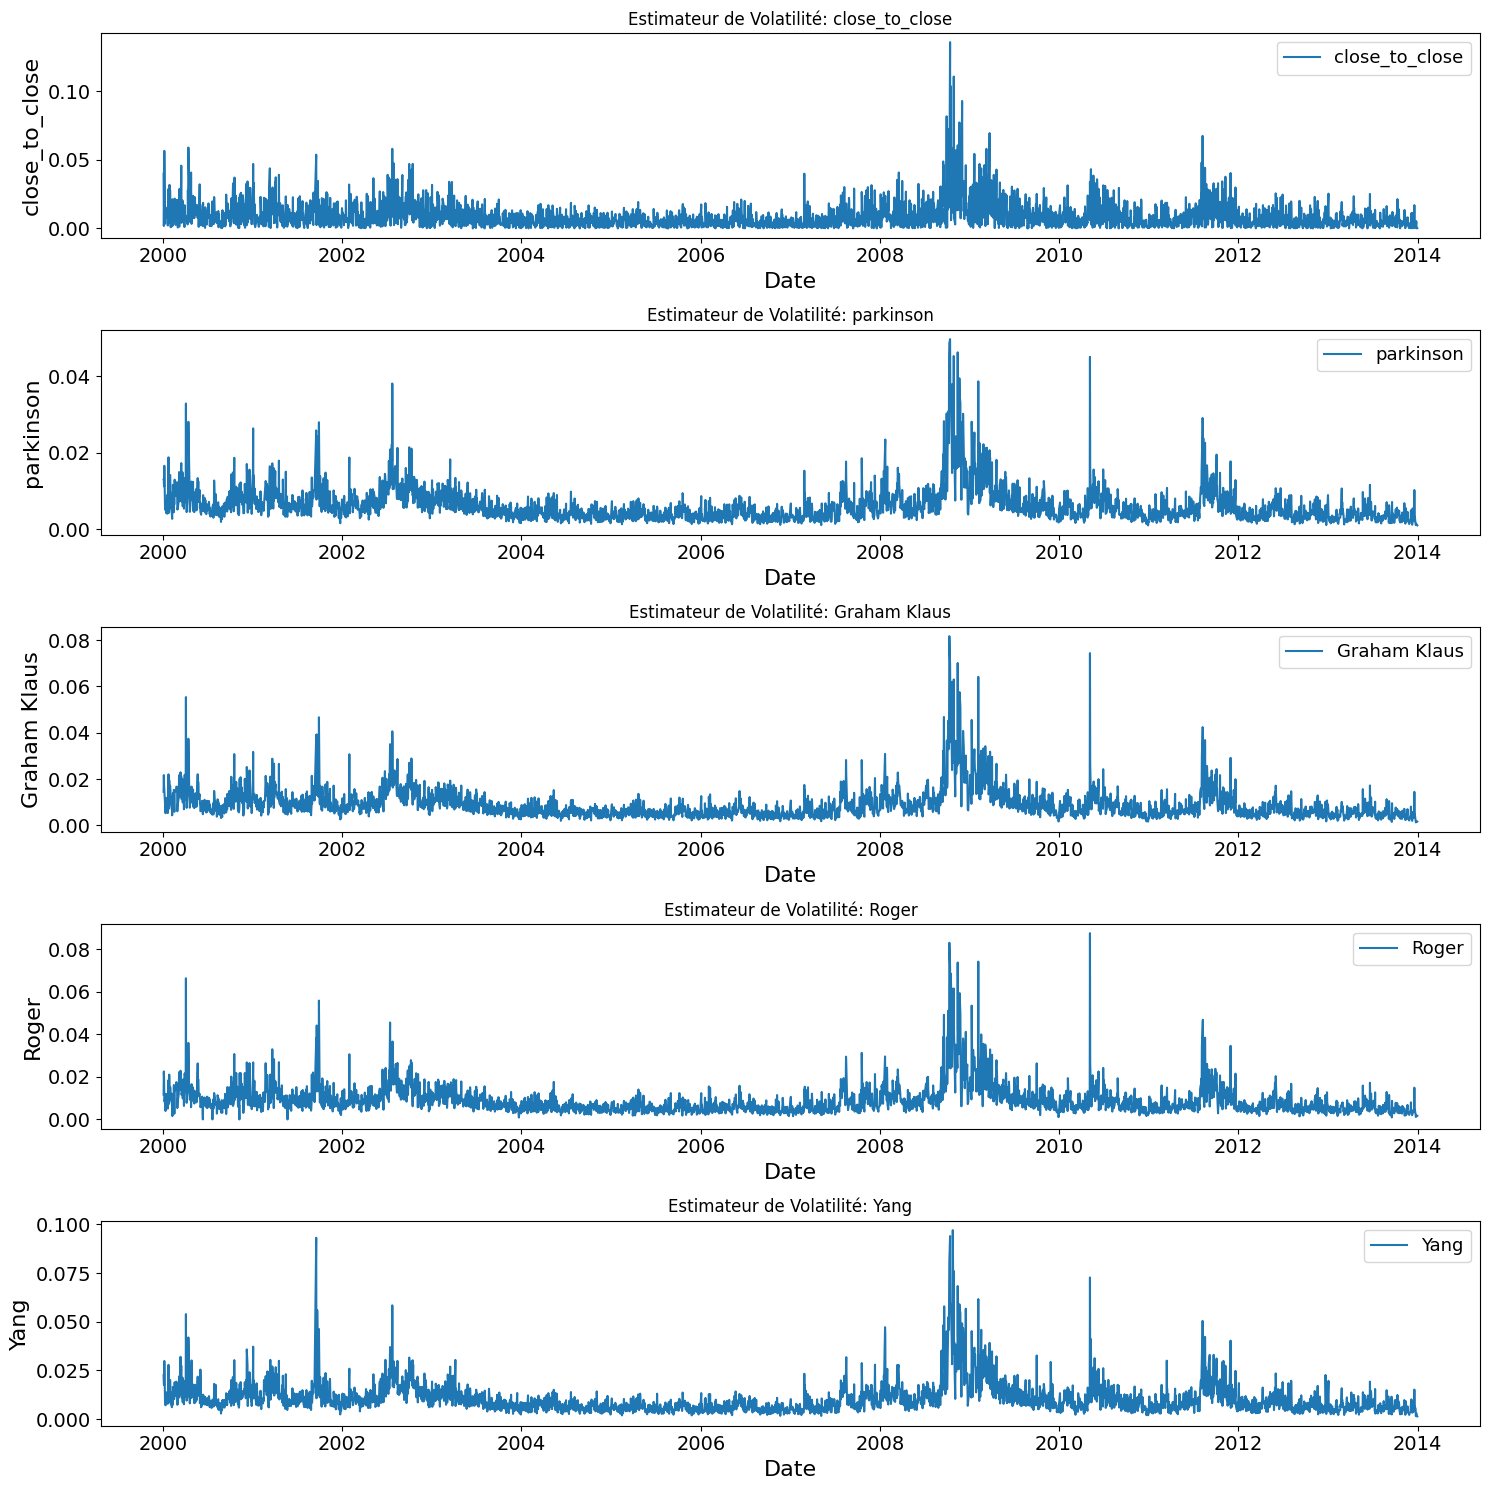

In [7]:
# list of all the estimators
estimators = ['close_to_close', 'parkinson', 'Graham Klaus', 'Roger', 'Yang']

plt.figure(figsize=(15, 15))

# Create a graph for each estimators
for i, estimator in enumerate(estimators, 1):
    plt.subplot(len(estimators), 1, i)
    plt.plot(data.index, np.abs(data[estimator]), label=estimator)
    plt.title(f'Estimateur de Volatilité: {estimator}')
    plt.xlabel('Date')
    plt.ylabel(estimator)
    plt.legend()

plt.tight_layout()

plt.show()


Calcul of the optimal k for the Yang-Zang volatility estimator

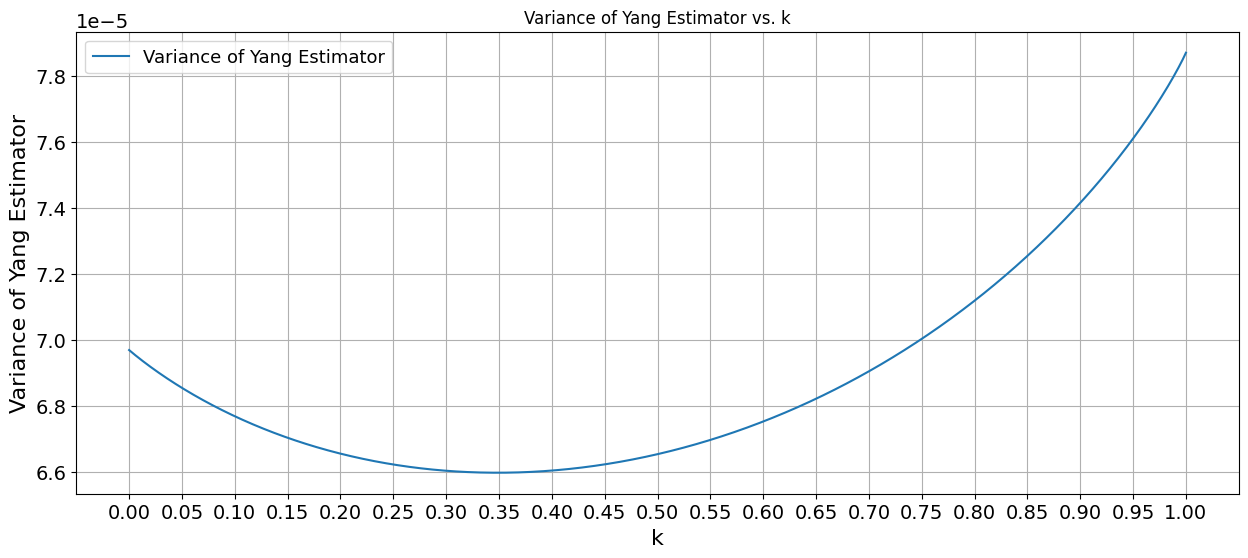

[6.598720122987587e-05, 0.3483483483483483]


In [8]:
#Initialise a list for the variance
k_values = np.linspace(0, 1, 1000)
yang_var = []
optimal_k = [np.inf, 0]

# Calculate the Yang estimator for each value of k
for k in k_values:
    yang_estimator = np.sqrt(
        (np.log(data['Open'] / data['Close'].shift(1)))**2 + 
        k * (np.log(data['Close'] / data['Open']))**2 + 
        (1 - k) * (data['Roger']**2)
    )
    yang_var.append(np.var(yang_estimator))
    if np.var(yang_estimator) < optimal_k[0]:
        optimal_k[1] = k
        optimal_k[0] = np.var(yang_estimator)

plt.figure(figsize=(15, 6))
plt.plot(k_values, yang_var, label='Variance of Yang Estimator')
plt.title('Variance of Yang Estimator vs. k')
plt.xlabel('k')
plt.ylabel('Variance of Yang Estimator')
plt.legend()
plt.grid(True)

plt.xticks(np.linspace(0, 1, 21))

plt.show()

print(optimal_k)


After analyzing the graph we just ploted, wen can choose the valu 0.35 for k wich minimize the variance of the Yang estimator.

## I.2) Study on the efficiency, precision and stability of each estimator

We are showing here a window of 3months but we had tested windows of 2 weeks up to one year and got similar results

In order to asses the stability of each estimator we will analyse the variance and lower the variance will be more the estimator will be efficient, for the accuracy we will analyse the bias as a non-bias estimator is more accurate. The MSE will be helpfull to conclude both on the accuracy and the efficiency.

In [9]:
realized_variance_5min = volatility['Realized Variance (5-minute)']

# Convert values to numeric, force errors to NaN, then drop them
realized_variance_5min = pd.to_numeric(realized_variance_5min, errors='coerce').dropna()

estimators = ['close_to_close', 'parkinson', 'Graham Klaus', 'Roger', 'Yang']

#This part of the code ensure that the .csv text and th data we extract from yahoofinance are the same size.
#It also make sure the type the data is presented in a way we can calculate
realized_variance_5min = realized_variance_5min.reset_index(drop=True)
data = data.reset_index(drop=True)

min_length = min(len(realized_variance_5min), len(data))
realized_variance_5min = realized_variance_5min[:min_length]
data = data.iloc[:min_length]

if 'DateID' in volatility.columns:
    data['Date'] = pd.to_datetime(volatility['DateID'], format='%Y%m%d')
else:
    data['Date'] = pd.date_range(start='2000-01-01', periods=len(data), freq='B')

In [10]:
# Initialize dictionaries to store quarterly errors
mse_dict = {estimator: [] for estimator in estimators}
mae_dict = {estimator: [] for estimator in estimators}
r2_dict = {estimator: [] for estimator in estimators}
biais_dict = {estimator: [] for estimator in estimators}
variance_dict = {estimator: [] for estimator in estimators}

# Group the data by quarter and calculate errors for each estimator
for _, group in data.groupby(pd.Grouper(key='Date', freq='Q')):
    realized_variance_5min_quarter = realized_variance_5min.loc[group.index]
    for estimator in estimators:
        mse = mean_squared_error(group[estimator], np.sqrt(realized_variance_5min_quarter))
        biais = np.sqrt(mse - group[estimator].var())
        mse_dict[estimator].append(mse)
        biais_dict[estimator].append(biais)
        variance_dict[estimator].append(group[estimator].var())


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3744\2524816473.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  for _, group in data.groupby(pd.Grouper(key='Date', freq='Q')):
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3744\2524816473.py:13: RuntimeWarning: invalid value encountered in sqrt
  biais = np.sqrt(mse - group[estimator].var())
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3744\2524816473.py:13: RuntimeWarning: invalid value encountered in sqrt
  biais = np.sqrt(mse - group[estimator].var())
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3744\2524816473.py:13: RuntimeWarning: invalid value encountered in sqrt
  biais = np.sqrt(mse - group[estimator].var())
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3744\2524816473.py:13: RuntimeWarning: invalid value encountered in sqrt
  biais = np.sqrt(mse - group[estimator].var())
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3744\2524816473.py:13: Runtim

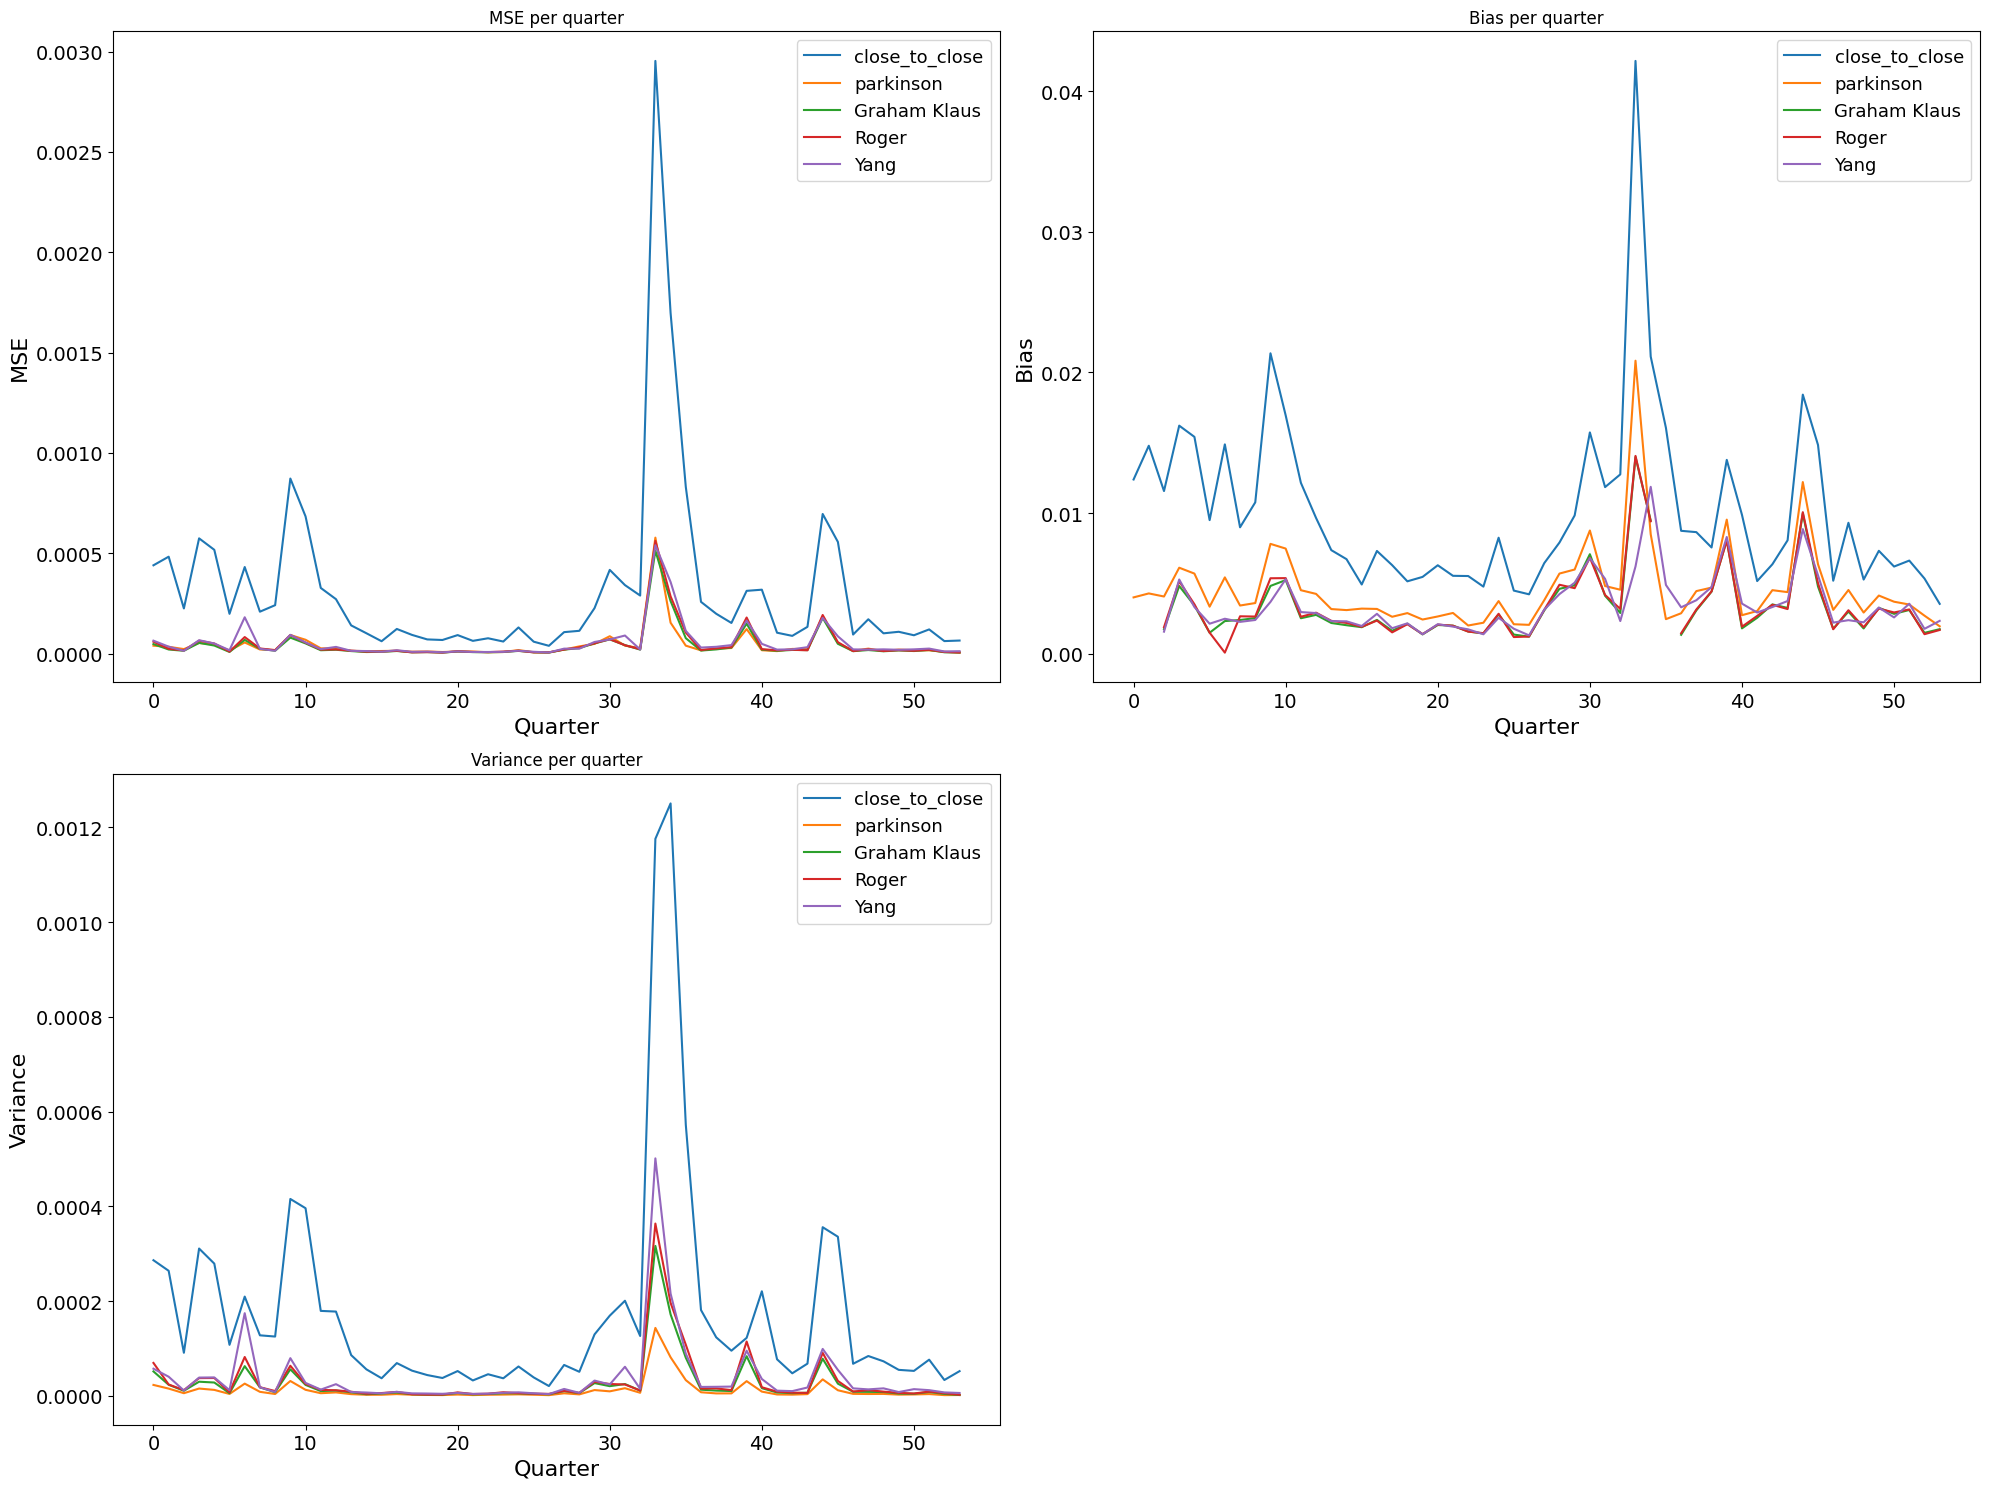

In [11]:
plt.figure(figsize=(20, 15))

# Plot the MSE
plt.subplot(2, 2, 1)
for estimator in estimators:
    plt.plot(mse_dict[estimator], label=estimator)
plt.title('MSE per quarter')
plt.xlabel('Quarter')
plt.ylabel('MSE')
plt.legend()

# Plot the biases
plt.subplot(2, 2, 2)
for estimator in estimators:
    plt.plot(biais_dict[estimator], label=estimator)
plt.title('Bias per quarter')
plt.xlabel('Quarter')
plt.ylabel('Bias')
plt.legend()

# Plot the variances
plt.subplot(2, 2, 3)
for estimator in estimators:
    plt.plot(variance_dict[estimator], label=estimator)
plt.title('Variance per quarter')
plt.xlabel('Quarter')
plt.ylabel('Variance')
plt.legend()

plt.tight_layout()
plt.show()

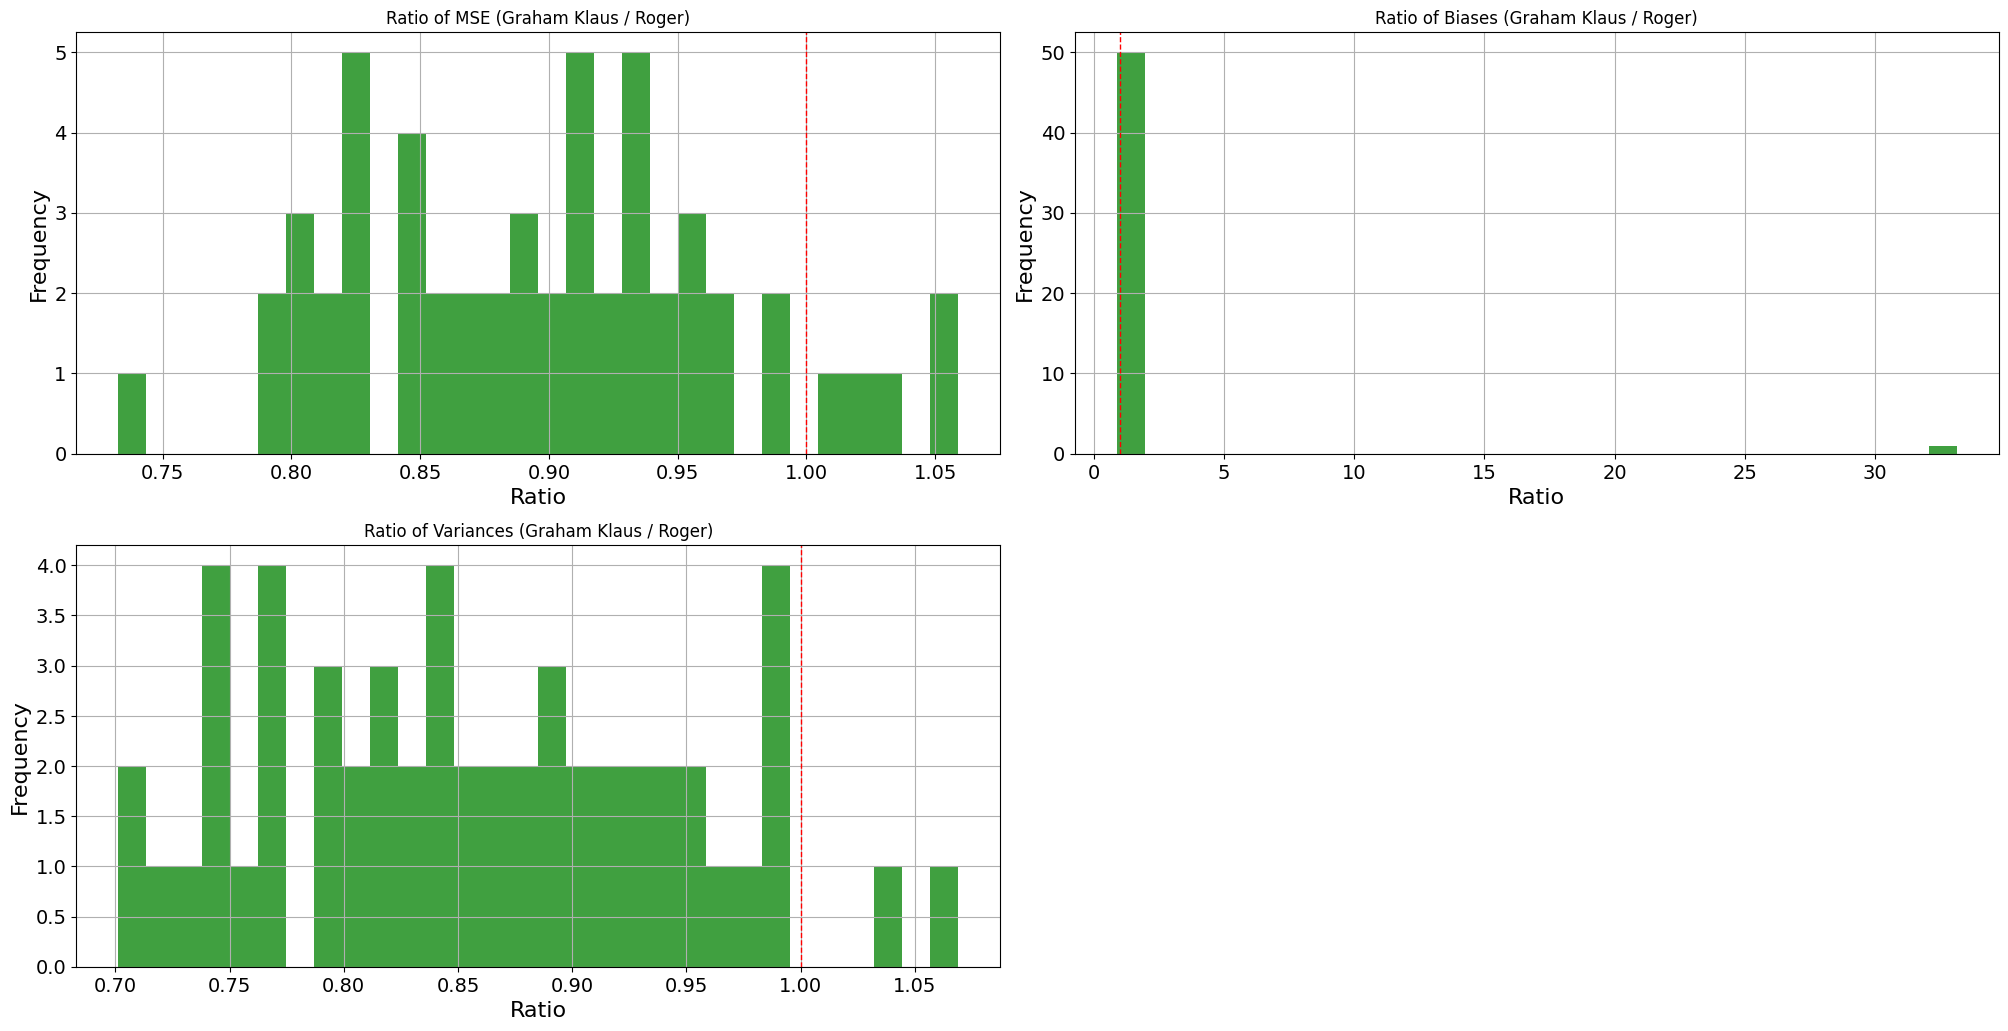

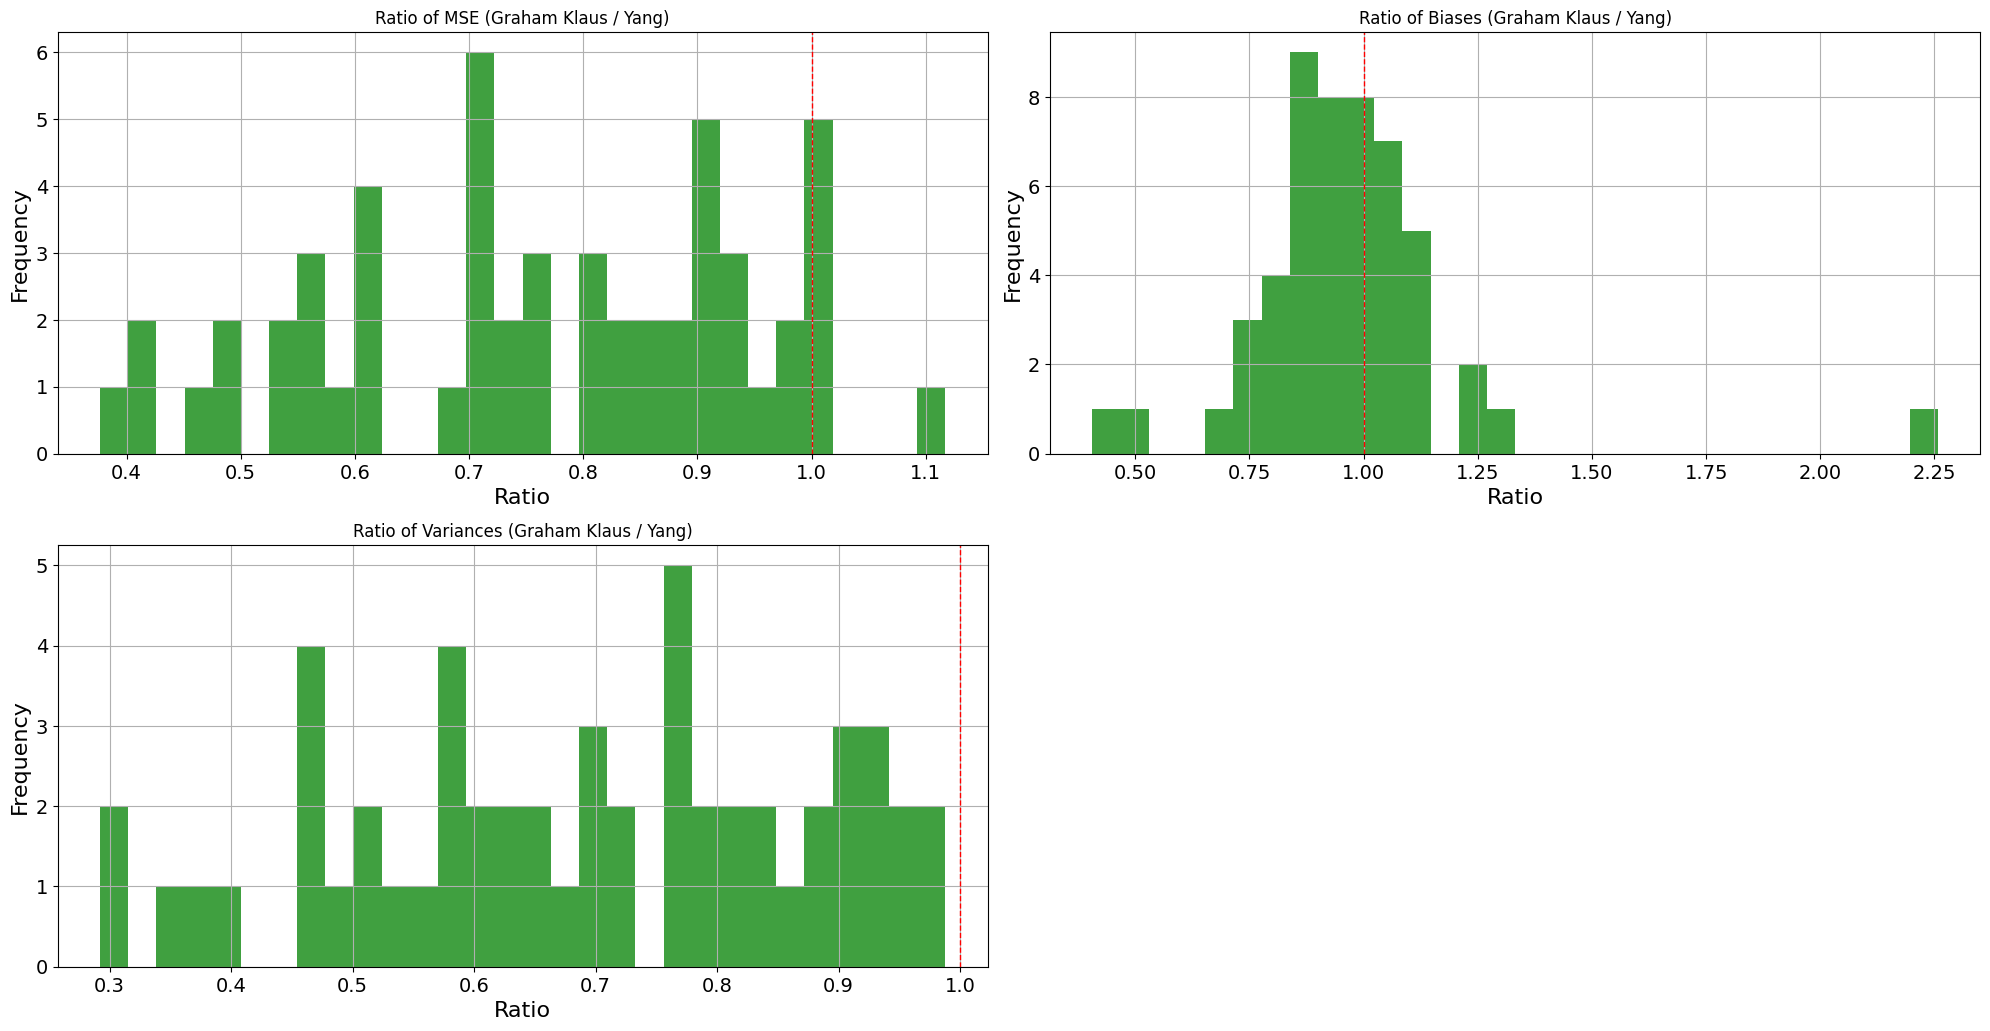

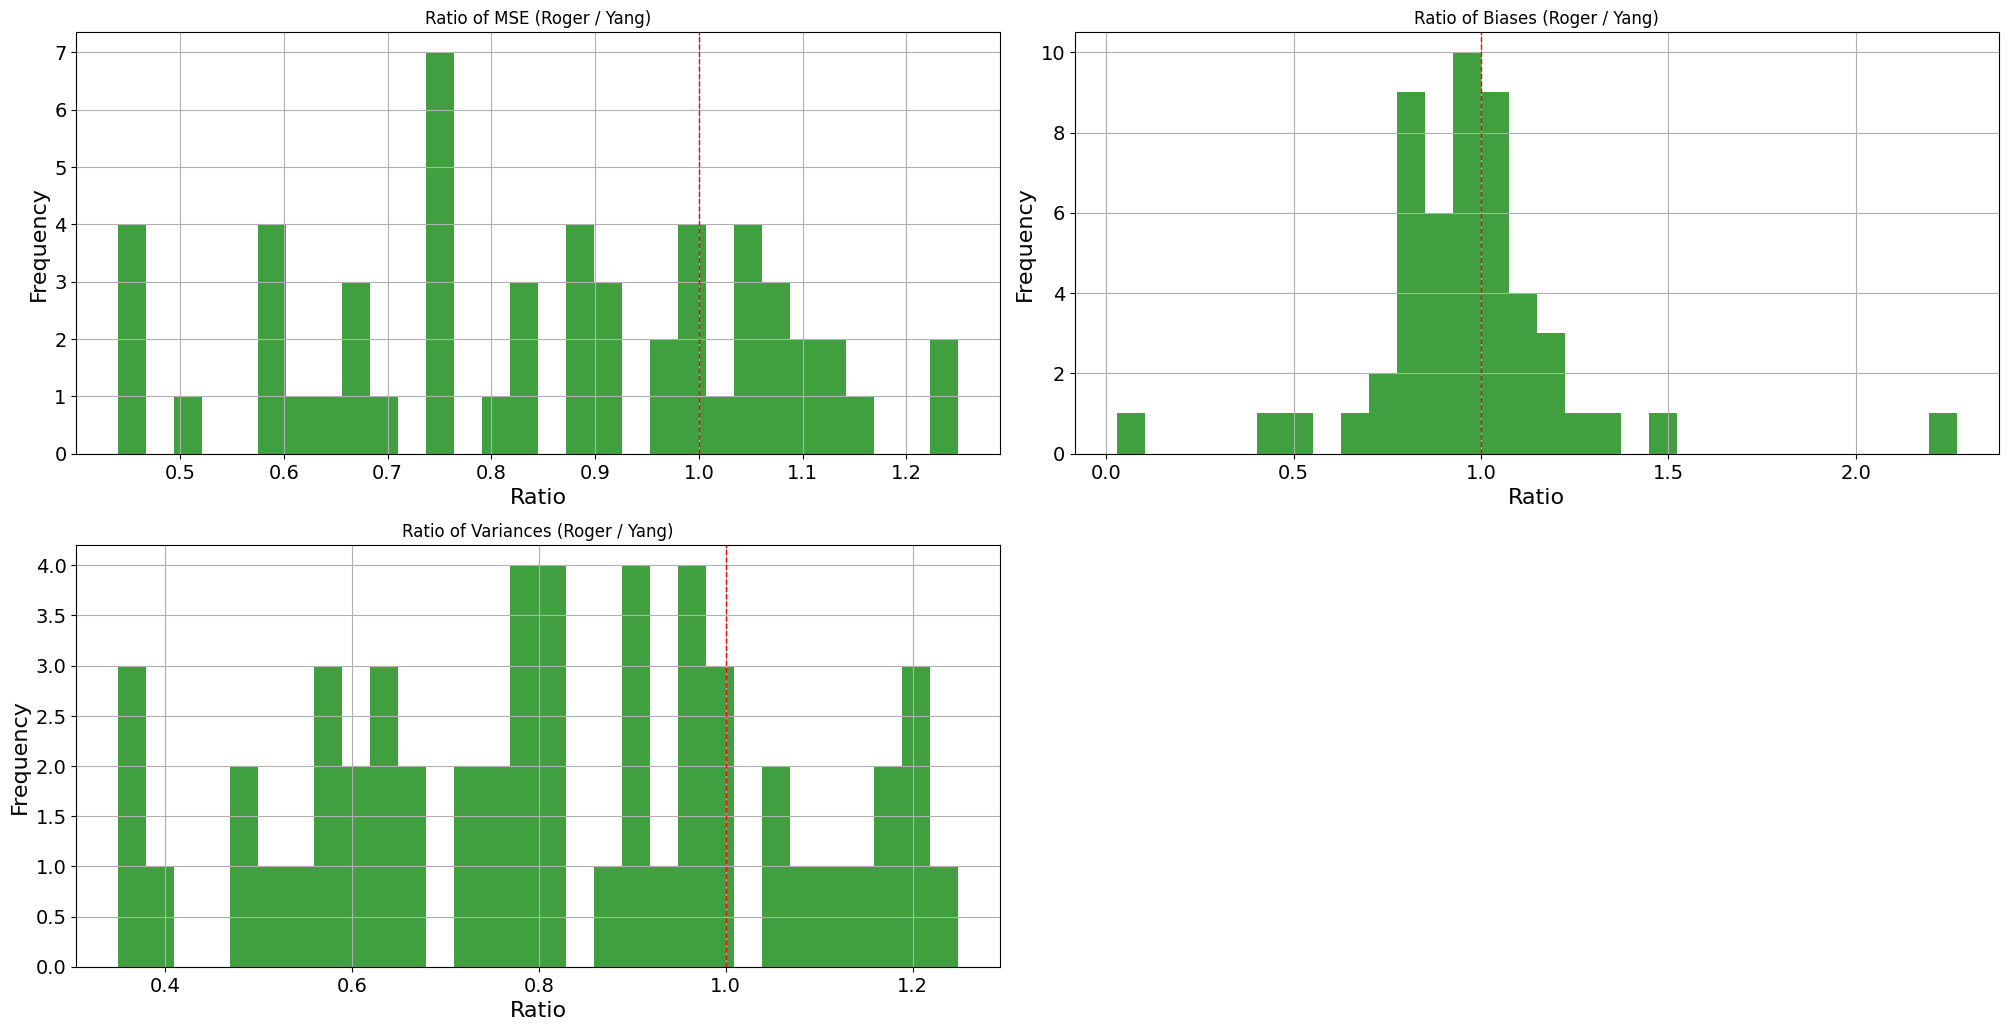

In [12]:
# The first two estimators are clearly less efficient, stable and accurate so we will not analyse them in depth and keep the other tree which are the most interesting
estimators = ['Graham Klaus', 'Roger', 'Yang']

permutational_doubles_suppression = []
# Calculate and plot the ratios between the estimators
for i in range(len(estimators)):
    for j in range(i + 1, len(estimators)):
        est1 = estimators[i]
        est2 = estimators[j]
        
        if (est1, est2) in permutational_doubles_suppression:
            break
        
        permutational_doubles_suppression.append((est1, est2))
        permutational_doubles_suppression.append((est2, est1))

        plt.figure(figsize=(20, 15))

        # Ratio of MSE
        ratios = np.array(mse_dict[est1]) / np.array(mse_dict[est2])
        plt.subplot(3, 2, 1)
        plt.hist(ratios, bins=30, alpha=0.75, color='green')
        plt.axvline(1, color='r', linestyle='dashed', linewidth=1)
        plt.title(f'Ratio of MSE ({est1} / {est2})')
        plt.xlabel('Ratio')
        plt.ylabel('Frequency')
        plt.grid(True)

        # Ratio of Biases
        ratios = np.array(biais_dict[est1]) / np.array(biais_dict[est2])
        plt.subplot(3, 2, 2)
        plt.hist(ratios, bins=30, alpha=0.75, color='green')
        plt.axvline(1, color='r', linestyle='dashed', linewidth=1)
        plt.title(f'Ratio of Biases ({est1} / {est2})')
        plt.xlabel('Ratio')
        plt.ylabel('Frequency')
        plt.grid(True)

        # Ratio of Variances
        ratios = np.array(variance_dict[est1]) / np.array(variance_dict[est2])
        plt.subplot(3, 2, 3)
        plt.hist(ratios, bins=30, alpha=0.75, color='green')
        plt.axvline(1, color='r', linestyle='dashed', linewidth=1)
        plt.title(f'Ratio of Variances ({est1} / {est2})')
        plt.xlabel('Ratio')
        plt.ylabel('Frequency')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

Conclusion:
- The Graham Klauss estimator is slightly less accurate that the Roger-Satchell one ( biais is higher) but is more stable( variance lower). And overall MSE is lower for the Graham klauss estimator so in conclusion we can state that the Klaus estimator is a better estimator than Roger.
- The Graham Klauss estimator has a similar accuracy than the Yang estimator ( the biais ratio of the two is evenly distributed around zero ), the Graham Klauss estimator is more stable than the Yang one because its variance is lower. In conclusion the Graham Klauss estimator is a better estimator than the Yang one because the MSE is lower.
So, Roger/yang follows approximatively the same graphics of MSE, Bias, Variance. So We can finally conclude Graham Klauss > Roger > Yang. Without forgetting we put aside the close to close and parkinson estimator because they are far worse.

We can be sceptic on the fact that the Yang-Zang estimator is not the best, so we can check if the biais calculate with its definition relation is the same one that we computed before.

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3744\897903760.py:28: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  for _, group in data.groupby(pd.Grouper(key='Date', freq='Q')):
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3744\897903760.py:32: RuntimeWarning: invalid value encountered in sqrt
  biais = np.sqrt(mse - group[estimator].var())
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3744\897903760.py:32: RuntimeWarning: invalid value encountered in sqrt
  biais = np.sqrt(mse - group[estimator].var())
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3744\897903760.py:32: RuntimeWarning: invalid value encountered in sqrt
  biais = np.sqrt(mse - group[estimator].var())
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3744\897903760.py:32: RuntimeWarning: invalid value encountered in sqrt
  biais = np.sqrt(mse - group[estimator].var())
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3744\897903760.py:32: RuntimeWarn

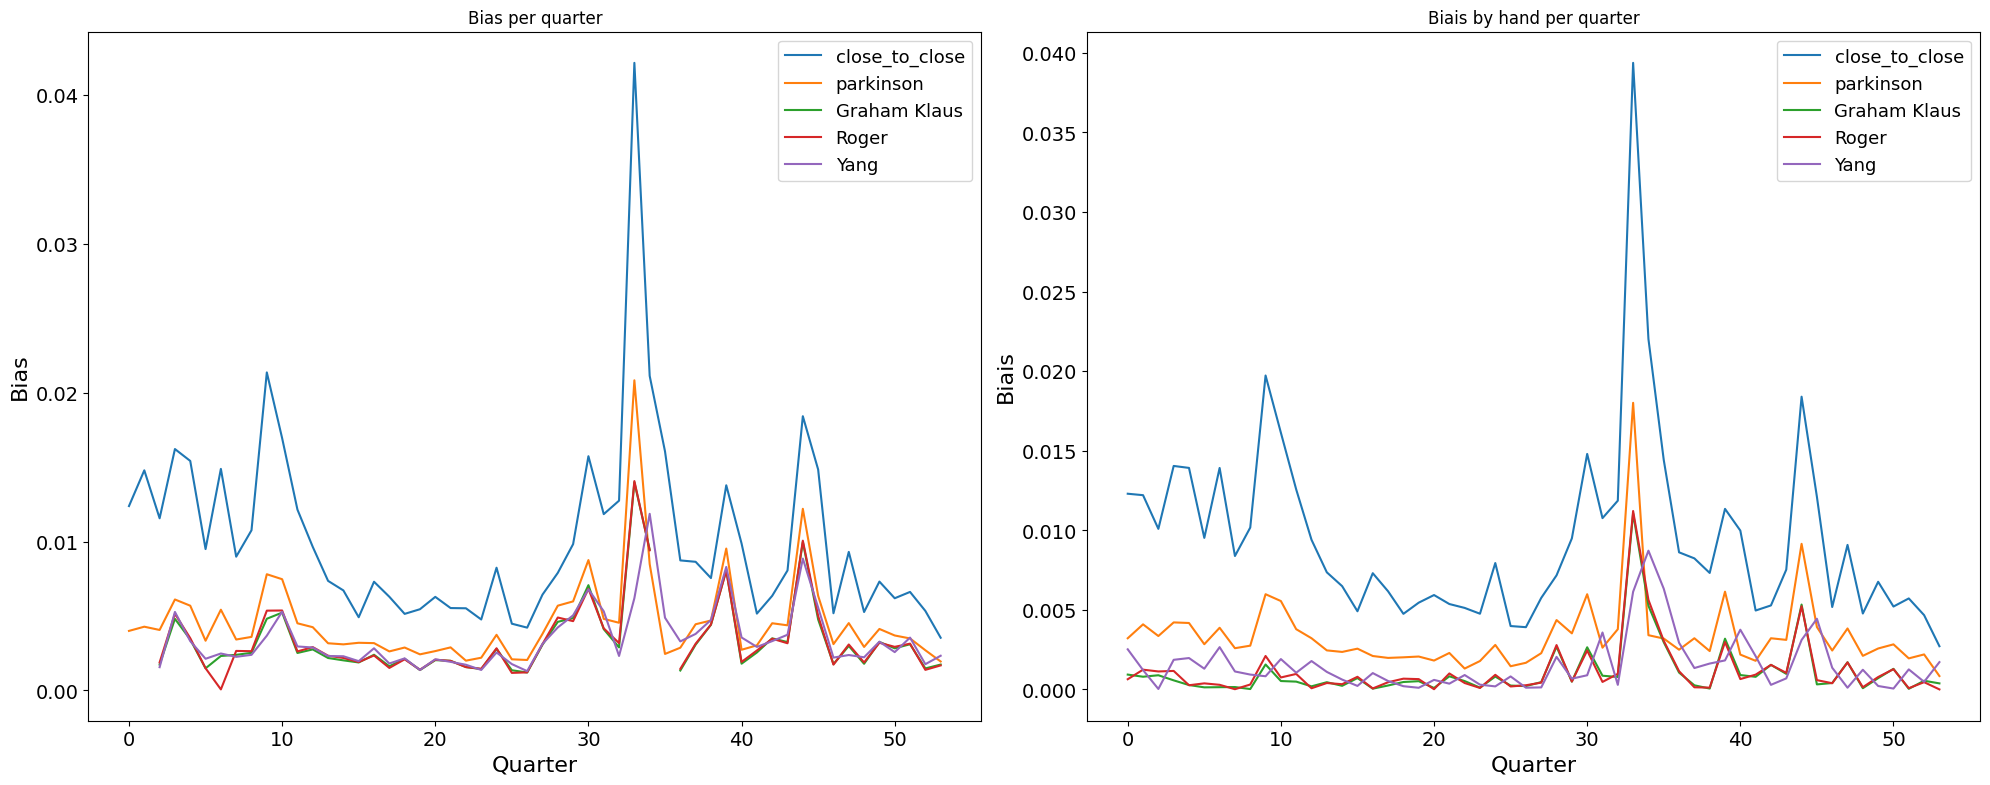

In [13]:
estimators = ['close_to_close', 'parkinson', 'Graham Klaus', 'Roger', 'Yang']

# Ensure that the indices of the data match
realized_variance_5min = realized_variance_5min.reset_index(drop=True)
data = data.reset_index(drop=True)

# Check that the lengths match
min_length = min(len(realized_variance_5min), len(data))
realized_variance_5min = realized_variance_5min[:min_length]
data = data.iloc[:min_length]

# Add a date column from the CSV file if it exists
if 'DateID' in volatility.columns:
    data['Date'] = pd.to_datetime(volatility['DateID'], format='%Y%m%d')
else:
    data['Date'] = pd.date_range(start='2000-01-01', periods=len(data), freq='B')

# Initialize dictionaries to store quarterly errors
mse_dict = {estimator: [] for estimator in estimators}
mae_dict = {estimator: [] for estimator in estimators}
r2_dict = {estimator: [] for estimator in estimators}
biais_dict = {estimator: [] for estimator in estimators}
variance_dict = {estimator: [] for estimator in estimators}

biais_byhand_dict = {estimator: [] for estimator in estimators}

# Group the data by quarter and calculate errors for each estimator
for _, group in data.groupby(pd.Grouper(key='Date', freq='Q')):
    realized_variance_5min_quarter = realized_variance_5min.loc[group.index]
    for estimator in estimators:
        mse = mean_squared_error(group[estimator], np.sqrt(realized_variance_5min_quarter))
        biais = np.sqrt(mse - group[estimator].var())
        
        biais_byhand = np.abs((np.mean(group[estimator] - np.sqrt(np.array(realized_variance_5min_quarter)))))
        
        mse_dict[estimator].append(mse)
        biais_dict[estimator].append(biais)
        
        
        biais_byhand_dict[estimator].append(biais_byhand)

# Plot the errors for each estimator
plt.figure(figsize=(20, 15))

# Plot the biases
plt.subplot(2, 2, 1)
for estimator in estimators:
    plt.plot(biais_dict[estimator], label=estimator)
plt.title('Bias per quarter')
plt.xlabel('Quarter')
plt.ylabel('Bias')
plt.legend()


# Plot the variances
plt.subplot(2, 2, 2)
for estimator in estimators:
    plt.plot(biais_byhand_dict[estimator], label=estimator)
plt.title('Biais by hand per quarter')
plt.xlabel('Quarter')
plt.ylabel('Biais')
plt.legend()

plt.tight_layout()
plt.show()

We can conclude we have the right biais, so the result seems to be right even if not having the Yang-Zang estimators as the best one was not what we expected

## I.3- Prediction of intraday volatility using the Garch model

In [14]:
volatility = pd.read_csv('RealizedVarianceData.csv')
volatility['Return'] = pd.to_numeric(volatility['Return'], errors='coerce')

returns = volatility['Return'].dropna()
returns2=returns*252
log_returns = np.log(np.ones(len(returns2))+returns2)
log_returns = log_returns.replace([np.inf, -np.inf], np.nan).dropna()

print(log_returns)



3       0.365196
4       0.237168
5       2.022549
6       1.296229
9       1.412352
          ...   
3652    0.547873
3654    0.675478
3655   -0.266478
3656   -0.067953
3657    0.532594
Name: Return, Length: 2467, dtype: float64


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3744\3959441403.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,2

We made sure that we remmoved the NaN values and kept the right values.

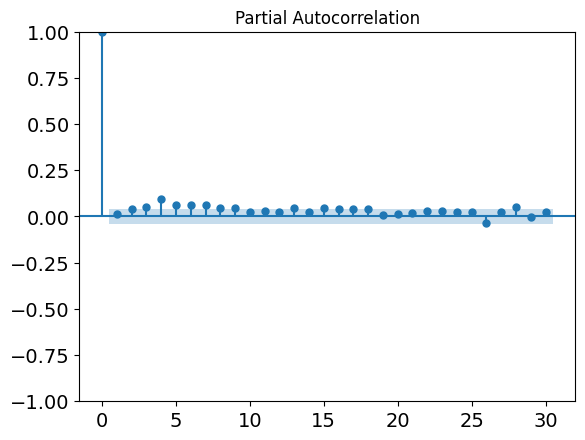

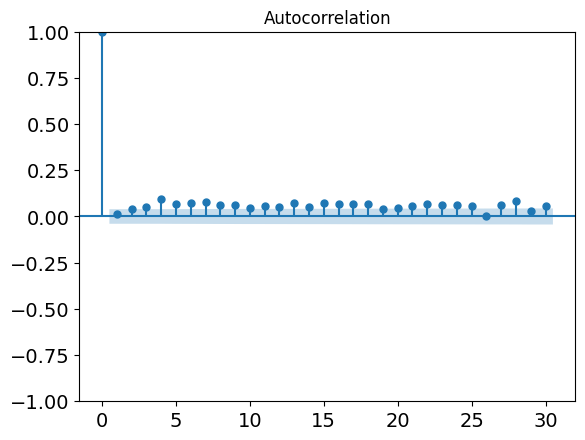

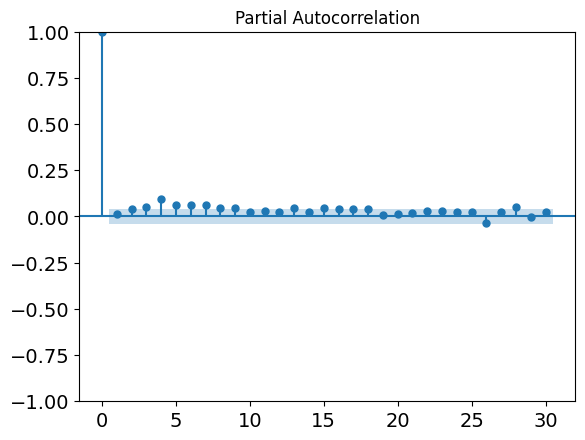

In [15]:
sm.graphics.tsa.plot_acf(log_returns, lags=30)
sm.graphics.tsa.plot_pacf(log_returns, lags=30)

When we look at both plots, we can observe that there are a lot of lags where autocorrelation's and partial-aurocorrelation's values are not equal or near 0. First, we shall consider high values of p and q for our garch model. However, we will look for a simplified model meaning we will take p and q values between 1 and 5.

In [16]:
M={}
for i in range(1,6):
    for j in range(1,6):
        model=arch_model(log_returns.iloc[0:1500], vol='Garch', p=i, q=j)
        model_fitted = model.fit(disp='off')
        M[(i,j)]=model_fitted

AIC = pd.DataFrame([((p,q),ft.aic) for (p,q), ft in M.items()],columns=['Model','AIC'])
AIC=AIC.assign(dAIC=(AIC.AIC-AIC.AIC.min()))
print(AIC.sort_values('AIC'))


     Model          AIC       dAIC
24  (5, 5)  4440.007282   0.000000
23  (5, 4)  4440.782952   0.775671
1   (1, 2)  4441.392136   1.384854
11  (3, 2)  4441.530228   1.522947
21  (5, 2)  4442.183663   2.176381
12  (3, 3)  4442.952251   2.944970
22  (5, 3)  4442.969896   2.962614
4   (1, 5)  4442.998549   2.991268
16  (4, 2)  4443.530237   3.522955
8   (2, 4)  4443.558031   3.550750
17  (4, 3)  4444.952251   4.944970
13  (3, 4)  4444.952251   4.944970
0   (1, 1)  4445.511353   5.504071
14  (3, 5)  4446.238789   6.231508
7   (2, 3)  4446.253339   6.246058
5   (2, 1)  4446.689012   6.681730
18  (4, 4)  4446.952251   6.944969
10  (3, 1)  4447.525105   7.517824
19  (4, 5)  4448.238790   8.231508
6   (2, 2)  4448.689012   8.681730
15  (4, 1)  4449.221692   9.214410
2   (1, 3)  4449.511353   9.504071
20  (5, 1)  4449.528688   9.521407
9   (2, 5)  4450.047492  10.040210
3   (1, 4)  4450.794794  10.787512


We tested several garch model with all the values of p and q considered as explained before by using the AIC test. We can concluded that acceptable model are model for values of (p,q): (5,5), (5,4), (1,2), (3,2). In the following steps, we will use a model (5,5). We could consider higher values but in that case we will enconter the over-fitting problem.

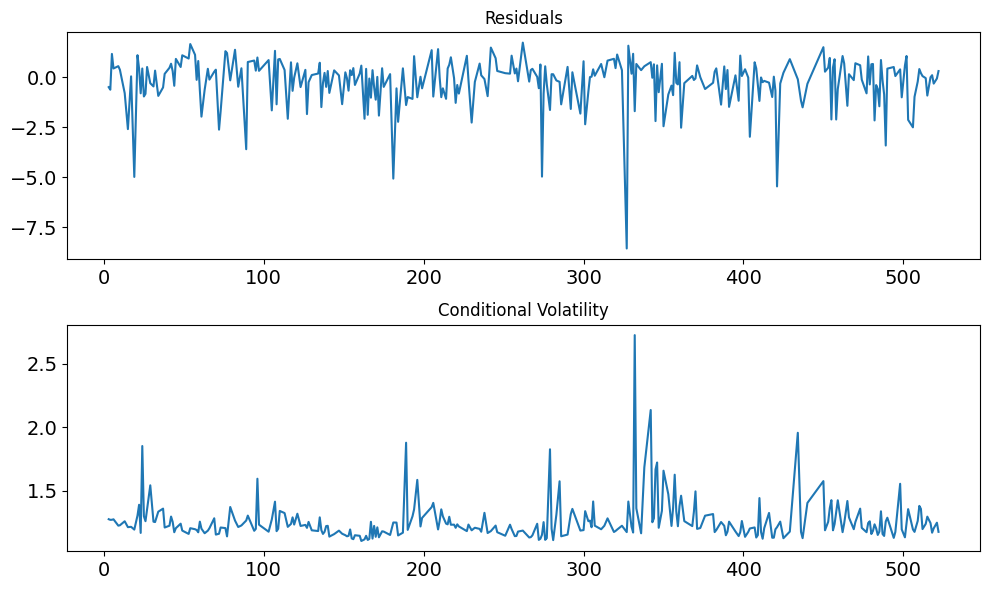

Forecasted Variances:
        h.001     h.002     h.003     h.004     h.005     h.006     h.007  \
522  1.321728  1.407622  1.407602  1.328473  1.421189  1.438565  1.538717   

        h.008     h.009   h.010  ...     h.191     h.192     h.193     h.194  \
522  1.408794  1.457917  1.4618  ...  1.575868  1.574697  1.573774  1.603045   

        h.195     h.196    h.197     h.198     h.199     h.200  
522  1.598924  1.564121  1.60685  1.582744  1.575822  1.572824  

[1 rows x 200 columns]


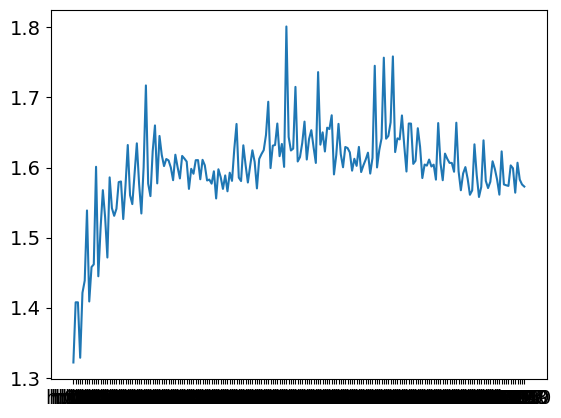

In [17]:
model = arch_model(log_returns.iloc[0:300], vol='Garch', p=5, q=5, dist='t') #using a t-student law
model_fitted = model.fit(disp='off')


residuals = model_fitted.resid
cond_vol = model_fitted.conditional_volatility
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(residuals)
ax[0].set_title('Residuals')
ax[1].plot(cond_vol)
ax[1].set_title('Conditional Volatility')

plt.tight_layout()
plt.show()

forecast = model_fitted.forecast(horizon=200, method='simulation')
forecast_variance = forecast.variance



print("Forecasted Variances:")
print(forecast_variance)

plt.plot(forecast_variance[-1:].T)


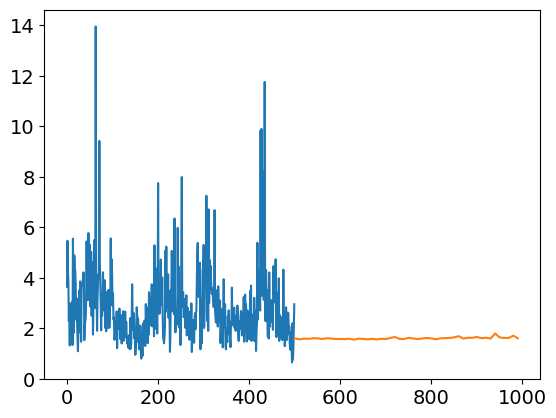

In [19]:
data['Graham Klaus'] = np.sqrt((1/2)*(np.log(data['High']/data['Low'])**2) - (2*np.log(2) - 1)*(np.log(data['Close']/data['Open'])**2))


t = np.linspace(0, 1000, 1000)

f=forecast_variance[-1:].T
plt.plot(t[0:500], data['Graham Klaus'][0:500].values*252)
plt.plot(t[500:1000:10], f[50:100])

For this first try we used ARMA model. However, it was not efficient to grass the specificity of our market data. For instance, the volatility was fixed above time.

Until then we had created a garch model trained by the data set of the 300 first points, in order to forcast the 200 following points. As we said it was not afficient. So now we will try to actualise the garch model meaning that we will use previous points to forcast the following and then include the forcasted point into the dataset in order to do a garch model again and so on.

In [20]:
estimate_var = []
for i in range(100, len(log_returns), 10):
    print(i)
    model = arch_model(log_returns.iloc[i-100:i], vol='Garch', p=5, q=5)
    model_fitted = model.fit(disp='off')
    forecast = model_fitted.forecast(horizon=1, method='simulation')
    estimate_var.append(forecast.variance.values[0][0])


    

100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2220
2230
2240
2250
2260
2270


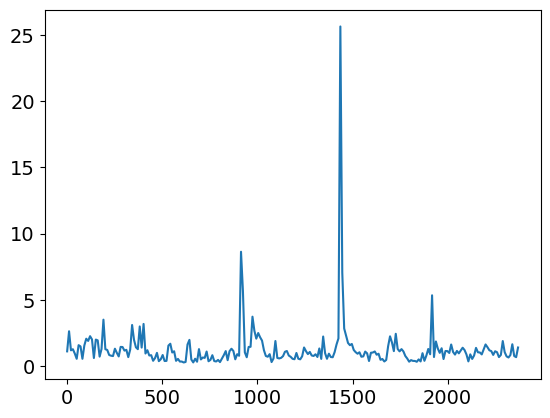

In [21]:
t=np.linspace(0,2370, 237)
plt.plot(t,estimate_var)

The results are more logical and seem more accurate than before. We will now compare our predicted result with the estimators' prediction of the volatility.

In [22]:
data['Roger'] = np.sqrt(np.log(data['High'] / data['Close']) * np.log(data['High'] / data['Open']) + np.log(data['Low'] / data['Close']) * np.log(data['Low'] / data['Open']))

data['Yang'] = np.sqrt( np.log(data['Open']/data['Close'].shift(1))**2 + k*(np.log(data['Close']/data['Open'])**2) + (1 - k)*(data['Roger']**2) )


         3649
h.1  1.384354


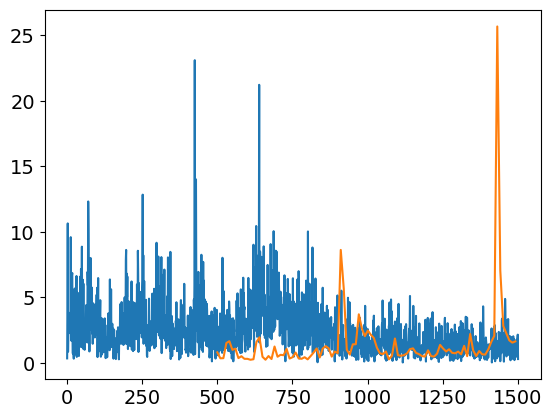

In [23]:
t = np.linspace(0, 1500, 1500)
print(forecast.variance[-1:].T)
plt.plot(t[0:1500], data['Yang'][0:1500].values*252)
plt.plot(t[500:1500:10], estimate_var[50:150])

         3649
h.1  1.384354


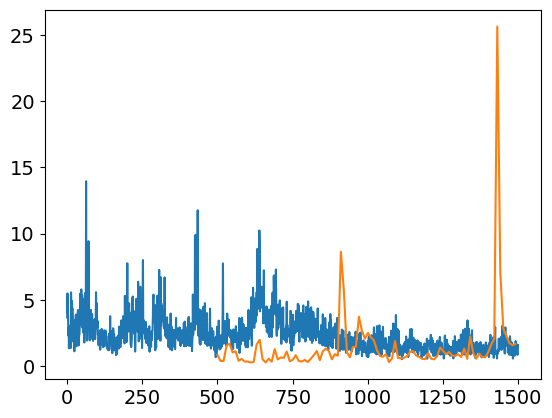

In [24]:
data['Graham Klaus'] = np.sqrt((1/2)*(np.log(data['High']/data['Low'])**2) - (2*np.log(2) - 1)*(np.log(data['Close']/data['Open'])**2))


t = np.linspace(0, 1500, 1500)
print(forecast.variance[-1:].T)
plt.plot(t[0:1500], data['Graham Klaus'][0:1500].values*252)
plt.plot(t[500:1500:10], estimate_var[50:150])

         3649
h.1  1.384354


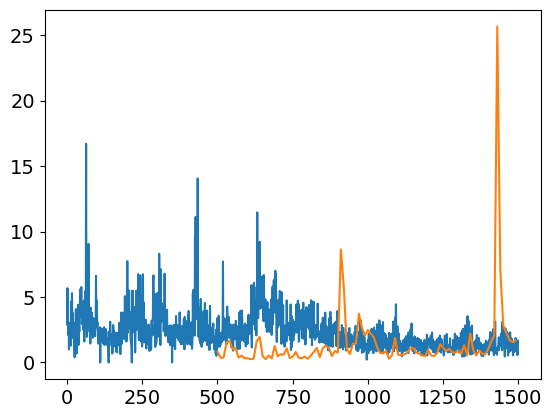

In [25]:
t = np.linspace(0, 1500, 1500)
print(forecast.variance[-1:].T)
plt.plot(t[0:1500], data['Roger'][0:1500].values*252)
plt.plot(t[500:1500:10], estimate_var[50:150])

In [ ]:

# Extract the true variance (realized variance) and estimated variance for the specified range
true_variance = data['Roger'][500:1500:10].values * 252  # Adjusted to match the time scale
estimated_variance = estimate_var[50:150]

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(true_variance, estimated_variance)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(true_variance, estimated_variance)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((true_variance - estimated_variance) / true_variance)) * 100

# Calculate Root Mean Squared Percentage Error (RMSPE)
rmspe = np.sqrt(np.mean(((true_variance - estimated_variance) / true_variance) ** 2)) * 100

# Calculate R-squared (R^2)
r2 = r2_score(true_variance, estimated_variance)

# Calculate Akaike Information Criterion (AIC)
n = len(true_variance)
residual = true_variance - estimated_variance
sse = np.sum(residual ** 2)
aic = n * np.log(sse / n) + 2 * 2

# Calculate Bayesian Information Criterion (BIC)
bic = n * np.log(sse / n) + 2 * np.log(n)

# Calculate Quasi-Likelihood Information Criterion (QLIKE)
qlike = np.mean(true_variance / estimated_variance - np.log(true_variance / estimated_variance) - 1)

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Percentage Error (RMSPE):", rmspe)
print("R-squared (R^2):", r2)
print("Akaike Information Criterion (AIC):", aic)
print("Bayesian Information Criterion (BIC):", bic)
print("Quasi-Likelihood Information Criterion (QLIKE):", qlike)

II- Rough Volatility

II.1 Ploting the Brownian motion

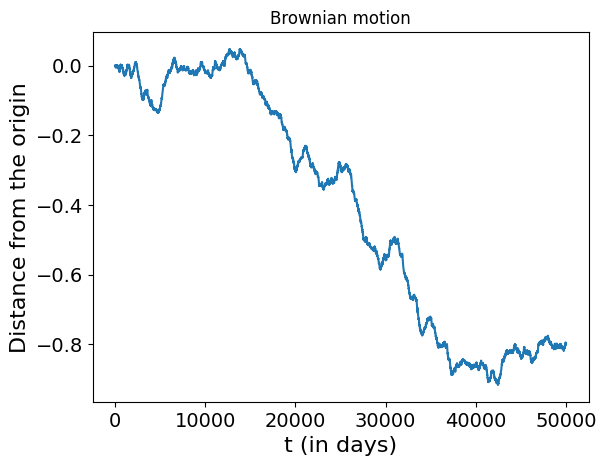

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [26]:
n = 50000

W = FBM(n, hurst=0.75, length=1, method='daviesharte').fbm()
#using the library fbm to create a brownian motion

plt.title('Brownian motion')
plt.xlabel('t (in days)')
plt.ylabel('Distance from the origin')
plt.plot(W)
plt.show()
plt.figure()

Extracting the real data

In [27]:
real_data = pd.read_csv("RealizedVarianceData.csv", index_col=0)

real_data

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3744\3187321784.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,2

Unnamed: 0 Realized Variance (5-minute)       Realized Kernel  \
0        DateID                      SPX2.rv               SPX2.rk   
1      20000103         0.000157239596459558  0.000160726642338866   
2      20000104         0.000298147448739244  0.000264396469319473   
3      20000105         0.000307225852905134  0.000304650302935347   
4      20000106         0.000136237904617473  0.000148582063339039   
...         ...                          ...                   ...   
3653   20131225                          NaN                   NaN   
3654   20131226                     0.000004              0.000005   
3655   20131227                     0.000005              0.000006   
3656   20131230                     0.000003              0.000003   
3657   20131231                     0.000008              0.000009   

                   Return  \
0                  SPX2.r   
1     -0.0101036180817431   
2     -0.0392921825644033   
3     0.00174919456727718   
4     0.00106211984850368   
...                   ...   
3653                  NaN   
3654             0.003829   
3655            -0.000928   
3656            -0.000261   
3657             0.002791   

     Realized Variance (5-minute using 1-minute subsamples)  \
0                                            SPX2.rv5ss       
1                                   0.00014410167533591       
2                                  0.000219256477223869       
3                                  0.000297788864162233       
4                                  0.000136479949750481       
...                                                 ...       
3653                                                NaN       
3654                                           0.000004       
3655                                           0.000005       
3656                                           0.000003       
3657                                           0.000009       

     Realized Variance (10-minute)  \
0                        SPX2.rv10   
1             0.000175343616941057   
2             0.000399598741726631   
3             0.000257950686631379   
4             0.000108310420121052   
...                            ...   
3653                           NaN   
3654                      0.000004   
3655                      0.000004   
3656                      0.000003   
3657                      0.000009   

     Realized Variance (10-minute using 1-minute subsamples)  \
0                                           SPX2.rv10ss        
1                                   0.00016970470393023        
2                                  0.000246740561211512        
3                                  0.000306705670365806        
4                                  0.000132804570273788        
...                                                 ...        
3653                                                NaN        
3654                                           0.000003        
3655                                           0.000004        
3656                                           0.000003        
3657                                            0.00001        

     Bipower Variation (5-minute)   \
0                         SPX2.bv5   
1             0.000156756760929018   
2             0.000205714859947726   
3             0.000292364730294294   
4             0.000127030281953223   
...                            ...   
3653                           NaN   
3654                      0.000002   
3655                      0.000006   
3656                      0.000003   
3657                      0.000007   

     Bipower Variation (5-minute using 1-minute subsamples)   \
0                                            SPX2.bv5ss        
1                                  0.000142221651656264        
2                                  0.000205847451568751        
3                                  0.000278867843969926        
4                                  0.000126582275994925

Ploting X depending on the brownian motion

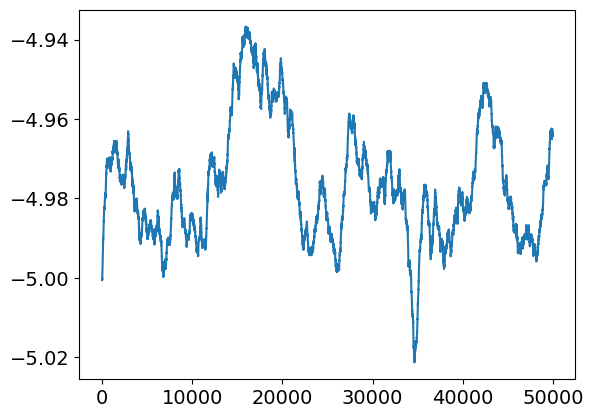

In [28]:
from fbm import FBM

nu = 0.3
alpha = 5e-4
m = -5

f = FBM(n, hurst=0.75, length=1, method='daviesharte')

# Generate a brownian motion
fbm_sample = f.fbm()


X_list = [-5]
dX_list = [nu*(fbm_sample[1] - fbm_sample[0]) + alpha * (m - X_list[0])]

for k in range(1, n-2):
    X_list.append(X_list[k-1] + dX_list[k-1])
    dX_list.append(nu*(fbm_sample[k+1] - fbm_sample[k]) + alpha * (m - X_list[k]))
    1
plt.plot(X_list)

X_list = np.array(X_list)


In [29]:
# Parameters
nu = 0.3
alpha = 5e-4
m = -5
n = 10000
num_trajectories = 100  # Increased number of trajectories for better averaging

# Initialize arrays to store mean results
all_the_trajectories = []

# Generate multiple trajectories
for _ in range(num_trajectories):
    # Generate a fBm realization
    hurst = 0.14
    fbm_sample = FBM(n, hurst, length=1, method='daviesharte').fbm()

    # Initialize lists for a single trajectory
    X_list = [m]
    dX_list = [nu * (fbm_sample[1] - fbm_sample[0]) + alpha * (m - X_list[0])]

    # Calculate X_list and dX_list for a single trajectory
    for k in range(1, n-1):
        X_list.append(X_list[k-1] + dX_list[k-1])
        dX_list.append(nu * (fbm_sample[k] - fbm_sample[k-1]) + alpha * (m - X_list[k-1]))

    # Convert X_list to numpy array and accumulate
    X_list = np.array(X_list)
    
    all_the_trajectories.append(X_list)
    
concatenated_list = np.array([item for sublist in all_the_trajectories for item in sublist])

# Define q_list and delta
q_list = np.linspace(0.5, 3, 100)
delta = np.linspace(1, 100, 100, dtype=int)

# Calculate mean_q
mean_q = []
for q in q_list:
    L = []
    for delta_lag in delta:
        S = 0
        count = 0
        for trajectoire in all_the_trajectories:
            for i in range(1, int(len(trajectoire)//delta_lag)):
                diff = (trajectoire[int(i * delta_lag)]) - (trajectoire[int((i-1) * delta_lag)])
                diff_abs_q = abs(diff) ** q
                S += diff_abs_q
                count += 1
        M = S / count if count > 0 else 0
        L.append(M)
    mean_q.append(L)

# Convert mean_q to numpy array for easier handling
mean_q = np.array(mean_q)

# Plotting the distribution of log-volatility increments for various lags
lags = [1, 5, 25, 125]



plt.figure(figsize=(12, 8))
for i, lag in enumerate(lags, 1):
    increments_list = [trajectoire[lag:] - trajectoire[:-lag] for trajectoire in all_the_trajectories]
    increments = np.array([item for sublist in increments_list for item in sublist])
    plt.subplot(2, 2, i)
    plt.hist(increments, bins=30, density=True, alpha=0.6, color='g')
    mu, std = np.mean(increments), np.std(increments)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = np.exp(-((x - mu) ** 2) / (2 * std ** 2)) / (np.sqrt(2 * np.pi) * std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(f'Lag = {lag} Days')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

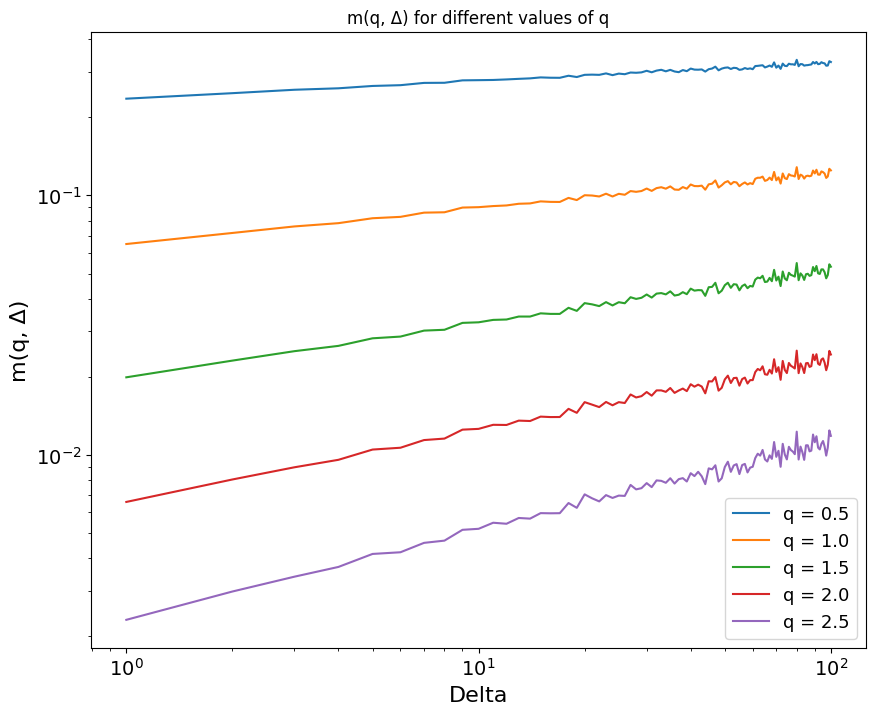

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 8))
for i, q in enumerate(q_list[::20]):
    plt.plot(delta, mean_q[20 * i], label=f'q = {q:.1f}')
plt.xlabel('Delta')
plt.ylabel('m(q, Δ)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title('m(q, Δ) for different values of q')
plt.show()

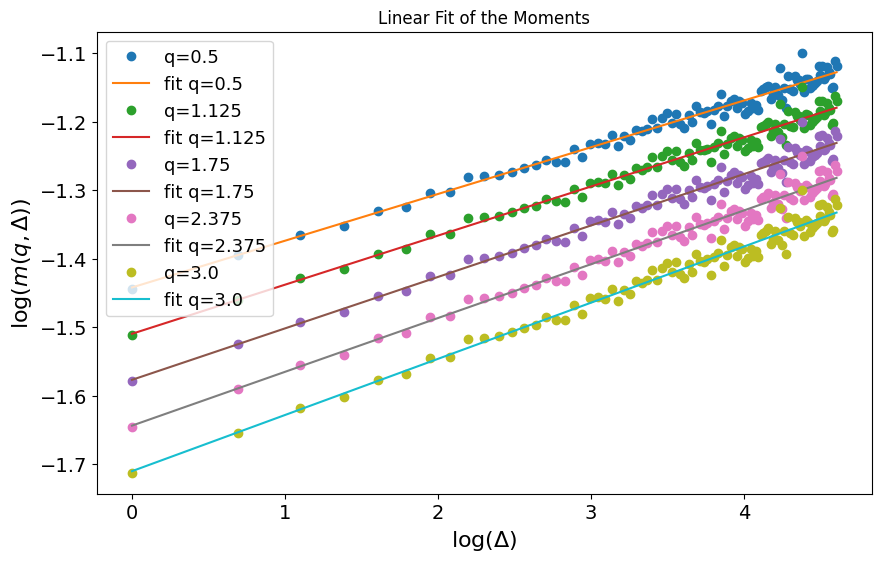

In [ ]:
# Calculate the linear coefficients
log_delta = np.log(delta)
zeta_q = []

q_list_2 = np.linspace(0.5, 3, 5)

plt.figure(figsize=(10, 6))
for i, q in enumerate(q_list_2):
    log_m_q_delta = np.log(mean_q[i])
    slope, intercept, _, _, _ = linregress(log_delta, log_m_q_delta)
    zeta_q.append(slope)
    plt.plot(log_delta, log_m_q_delta, 'o', label=f'q={q}')
    plt.plot(log_delta, slope * log_delta + intercept, '-', label=f'fit q={q}')
plt.xlabel(r'$\log(\Delta)$')
plt.ylabel(r'$\log(m(q, \Delta))$')
plt.legend()
plt.title('Linear Fit of the Moments')
plt.show()

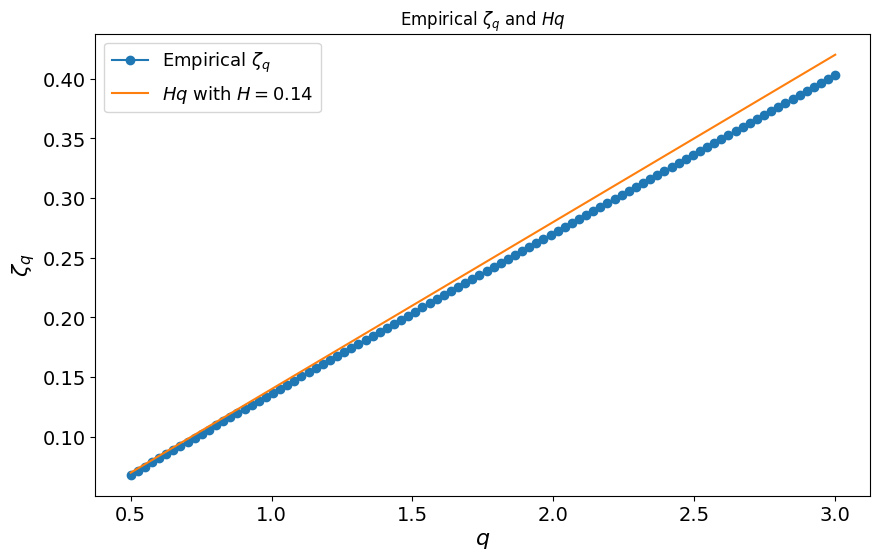

In [ ]:
zeta_q = []

for i, q in enumerate(q_list):
    log_m_q_delta = np.log(mean_q[i])
    slope, intercept, _, _, _ = linregress(log_delta, log_m_q_delta)
    zeta_q.append(slope)
    
# Plotting the zeta_q vs q
plt.figure(figsize=(10, 6))
plt.plot(q_list, zeta_q, 'o-', label='Empirical $\zeta_q$')
plt.plot(q_list, hurst * q_list, '-', label=f'$Hq$ with $H={hurst}$')
plt.xlabel(r'$q$')
plt.ylabel(r'$\zeta_q$')
plt.legend()
plt.title('Empirical $\zeta_q$ and $Hq$')
plt.show()

## II.2 Conducting the same procedure to real market data

In [43]:
volatility['Realized Kernel'] = pd.to_numeric(volatility['Realized Kernel'], errors='coerce')

volatility.dropna(subset=['Realized Kernel'], inplace=True)


volatility['sqrt']= np.sqrt(volatility['Realized Kernel'])
volatility['log_sqrt'] = np.log(volatility['sqrt'])

volatility

Unnamed: 0.1 Unnamed: 0 Realized Variance (5-minute)  Realized Kernel  \
1                1   20000103         0.000157239596459558         0.000161   
2                2   20000104         0.000298147448739244         0.000264   
3                3   20000105         0.000307225852905134         0.000305   
4                4   20000106         0.000136237904617473         0.000149   
5                5   20000107         9.27209869197684E-05         0.000123   
...            ...        ...                          ...              ...   
3652          3652   20131224                     0.000002         0.000002   
3654          3654   20131226                     0.000004         0.000005   
3655          3655   20131227                     0.000005         0.000006   
3656          3656   20131230                     0.000003         0.000003   
3657          3657   20131231                     0.000008         0.000009   

        Return Realized Variance (5-minute using 1-minute subsamples)  \
1    -0.010104                                0.00014410167533591       
2    -0.039292                               0.000219256477223869       
3     0.001749                               0.000297788864162233       
4     0.001062                               0.000136479949750481       
5     0.026022                               0.000111819433642809       
...        ...                                                ...       
3652  0.002895                                           0.000002       
3654  0.003829                                           0.000004       
3655 -0.000928                                           0.000005       
3656 -0.000261                                           0.000003       
3657  0.002791                                           0.000009       

     Realized Variance (10-minute)  \
1             0.000175343616941057   
2             0.000399598741726631   
3             0.000257950686631379   
4             0.000108310420121052   
5             0.000121495135491433   
...                            ...   
3652                      0.000002   
3654                      0.000004   
3655                      0.000004   
3656                      0.000003   
3657                      0.000009   

     Realized Variance (10-minute using 1-minute subsamples)  \
1                                   0.00016970470393023        
2                                  0.000246740561211512        
3                                  0.000306705670365806        
4                                  0.000132804570273788        
5                                  0.000113809042388789        
...                                                 ...        
3652                                           0.000001        
3654                                           0.000003        
3655                                           0.000004        
3656                                           0.000003        
3657                                            0.00001        

     Bipower Variation (5-minute)   \
1             0.000156756760929018   
2             0.000205714859947726   
3             0.000292364730294294   
4             0.000127030281953223   
5             8.30250894519708E-05   
...                            ...   
3652                      0.000001   
3654                      0.000002   
3655                      0.000006   
3656                      0.000003   
3657                      0.000007   

     Bipower Variation (5-minute using 1-minute subsamples)   ...  \
1                                  0.000142221651656264       ...   
2                                  0.000205847451568751       ...   
3                                  0.000278867843969926       ...   
4                                  0.000126582275994925       ...   
5                                  9.49011546626863E-05       ...   
...                                                 ...       ...   
3652          

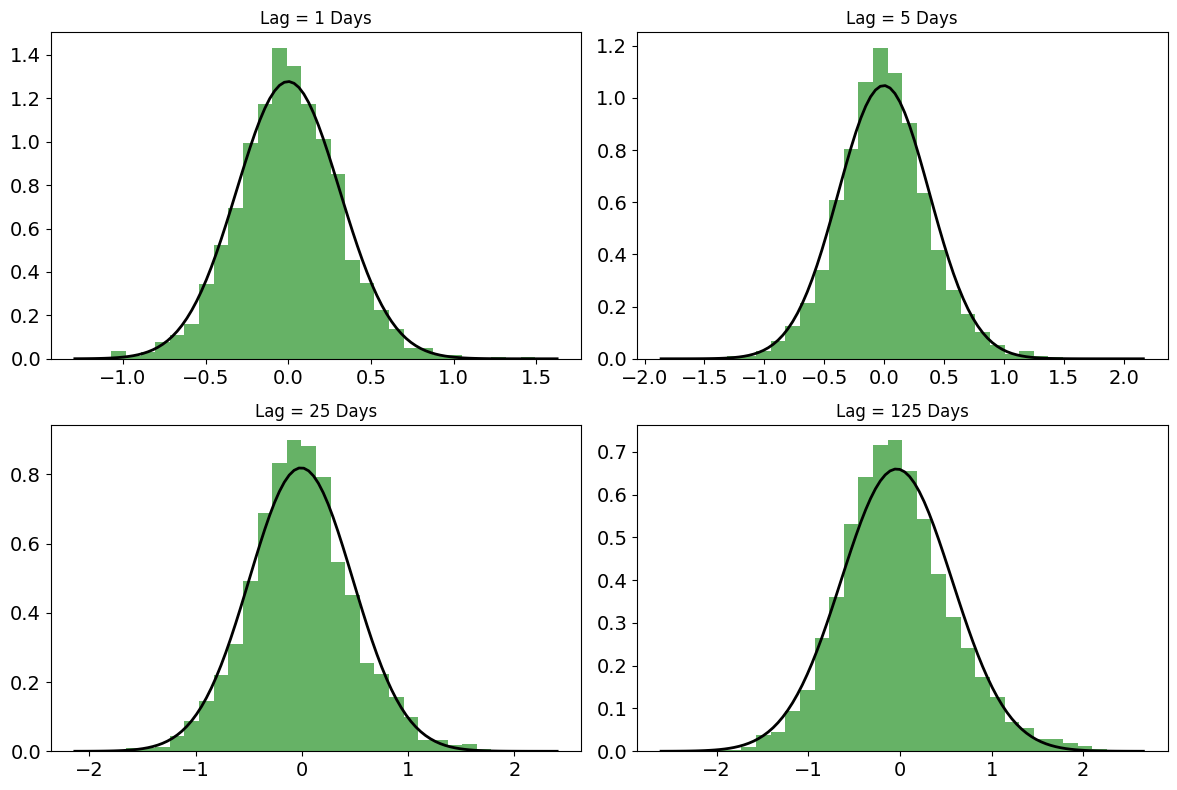

In [44]:
# Convert X_list to numpy array
X_list = np.array(volatility['log_sqrt'])

# Plotting the distribution of log-volatility increments for various lags
lags = [1, 5, 25, 125]

plt.figure(figsize=(12, 8))
for i, lag in enumerate(lags, 1):
    increments = X_list[lag:] - X_list[:-lag]
    plt.subplot(2, 2, i)
    plt.hist(increments, bins=30, density=True, alpha=0.6, color='g')
    mu, std = np.mean(increments), np.std(increments)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = np.exp(-((x - mu) ** 2) / (2 * std ** 2)) / (np.sqrt(2 * np.pi) * std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(f'Lag = {lag} Days')
plt.tight_layout()
plt.show()

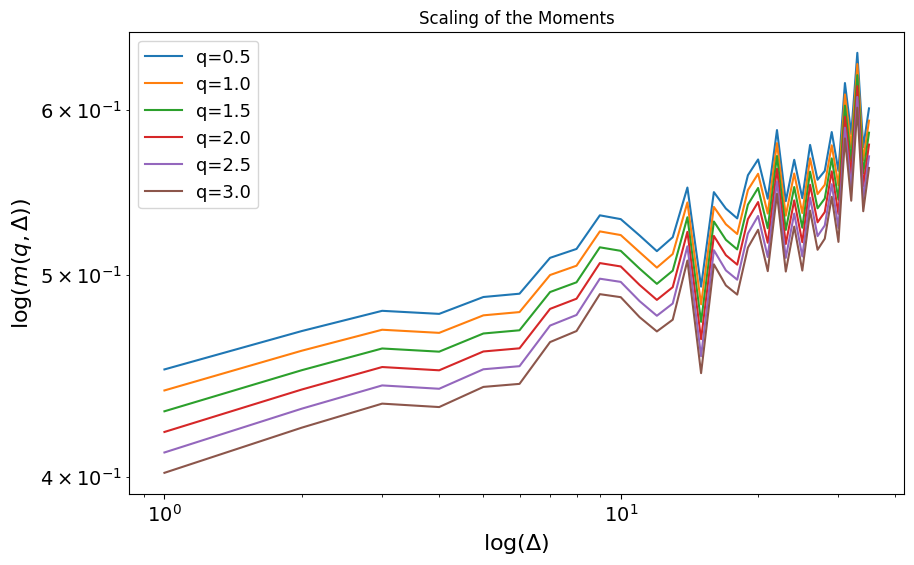

In [45]:
# Define q_list and delta
q_list = np.linspace(0.5, 3, 150)
delta = np.linspace(1, 35, 35)

q_list_2 = np.linspace(0.5, 3, 6)

# Calculate mean_q
mean_q = []
for k in q_list:
    L = []
    for j in delta:
        S = 0
        for i in range(1, int(len(X_list) // j)):
            diff = X_list[int(i * j)] - X_list[int((i-1) * j)]
            diff_abs_q = abs(diff) ** k
            S += diff_abs_q
        M = S / (len(X_list) // j)
        L.append(M)
    mean_q.append(L)

# Plot the scaling of the moments
plt.figure(figsize=(10, 6))
for i, q in enumerate(q_list_2):
    plt.plot(delta, mean_q[i], label=f'q={q}')
plt.xlabel(r'log($\Delta)$')
plt.ylabel(r'log($m(q, \Delta)$)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title('Scaling of the Moments')
plt.show()

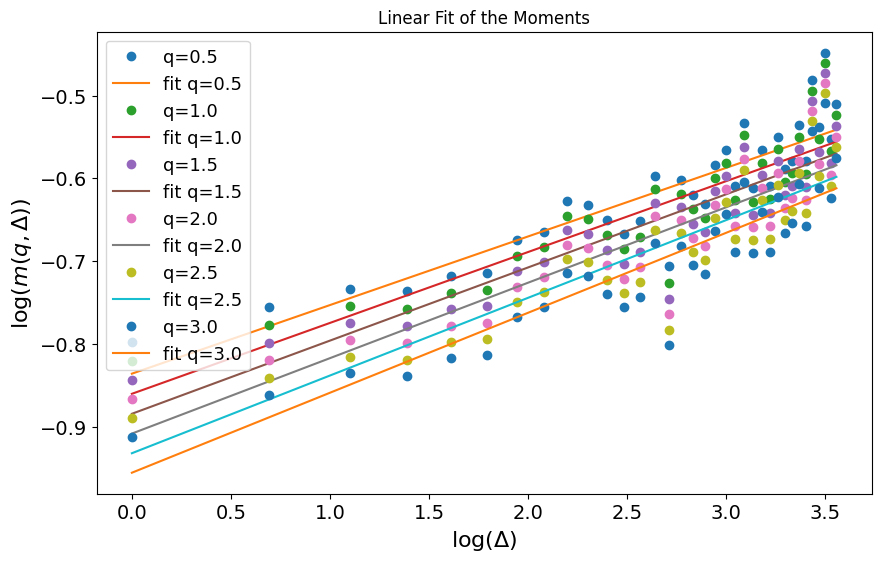

In [46]:
# Calculate the linear coefficients
log_delta = np.log(delta)
zeta_q = []

plt.figure(figsize=(10, 6))
for i, q in enumerate(q_list_2):
    log_m_q_delta = np.log(mean_q[i])
    slope, intercept, _, _, _ = linregress(log_delta, log_m_q_delta)
    zeta_q.append(slope)
    plt.plot(log_delta, log_m_q_delta, 'o', label=f'q={q}')
    plt.plot(log_delta, slope * log_delta + intercept, '-', label=f'fit q={q}')
plt.xlabel(r'$\log(\Delta)$')
plt.ylabel(r'$\log(m(q, \Delta))$')
plt.legend()
plt.title('Linear Fit of the Moments')
plt.show()

Directing coefficient (Hq): 0.14667231629430164


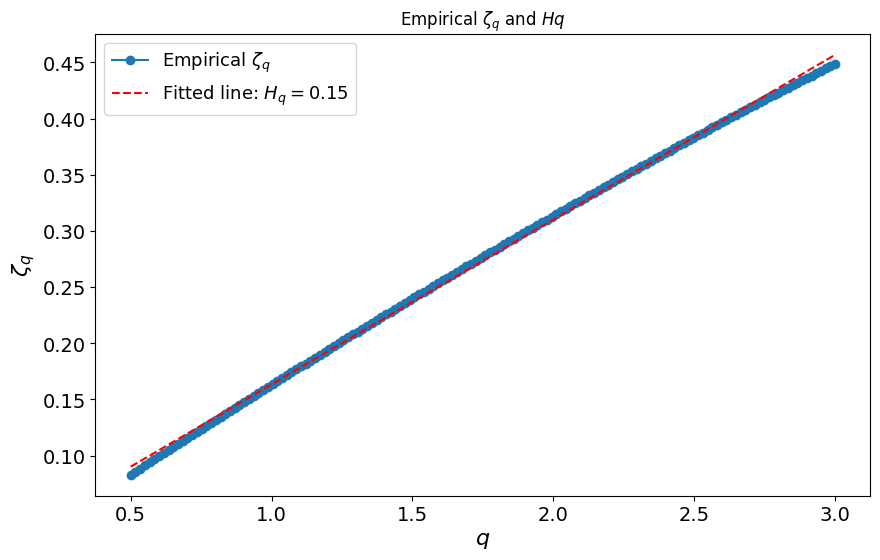

In [47]:
zeta_q = []
for i, q in enumerate(q_list):
    log_m_q_delta = np.log(mean_q[i])
    slope, intercept, _, _, _ = linregress(log_delta, log_m_q_delta)
    zeta_q.append(slope)

# Convert zeta_q and q_list to numpy arrays for fitting
zeta_q = np.array(zeta_q)
q_list = np.array(q_list)

# Perform linear regression on zeta_q vs q_list
Hq_slope, Hq_intercept, r_value, p_value, std_err = linregress(q_list, zeta_q)

# Print the directing coefficient Hq
print(f"Directing coefficient (Hq): {Hq_slope}")

# Plotting the zeta_q vs q with the fitted line
plt.figure(figsize=(10, 6))
plt.plot(q_list, zeta_q, 'o-', label='Empirical $\zeta_q$')
plt.plot(q_list, Hq_slope * q_list + Hq_intercept, 'r--', label=f'Fitted line: $H_q = {Hq_slope:.2f}$')
plt.xlabel(r'$q$')
plt.ylabel(r'$\zeta_q$')
plt.legend()
plt.title('Empirical $\zeta_q$ and $Hq$')
plt.show()

## II.3 Study of autocorrelation structure

### Study with the simulated data:

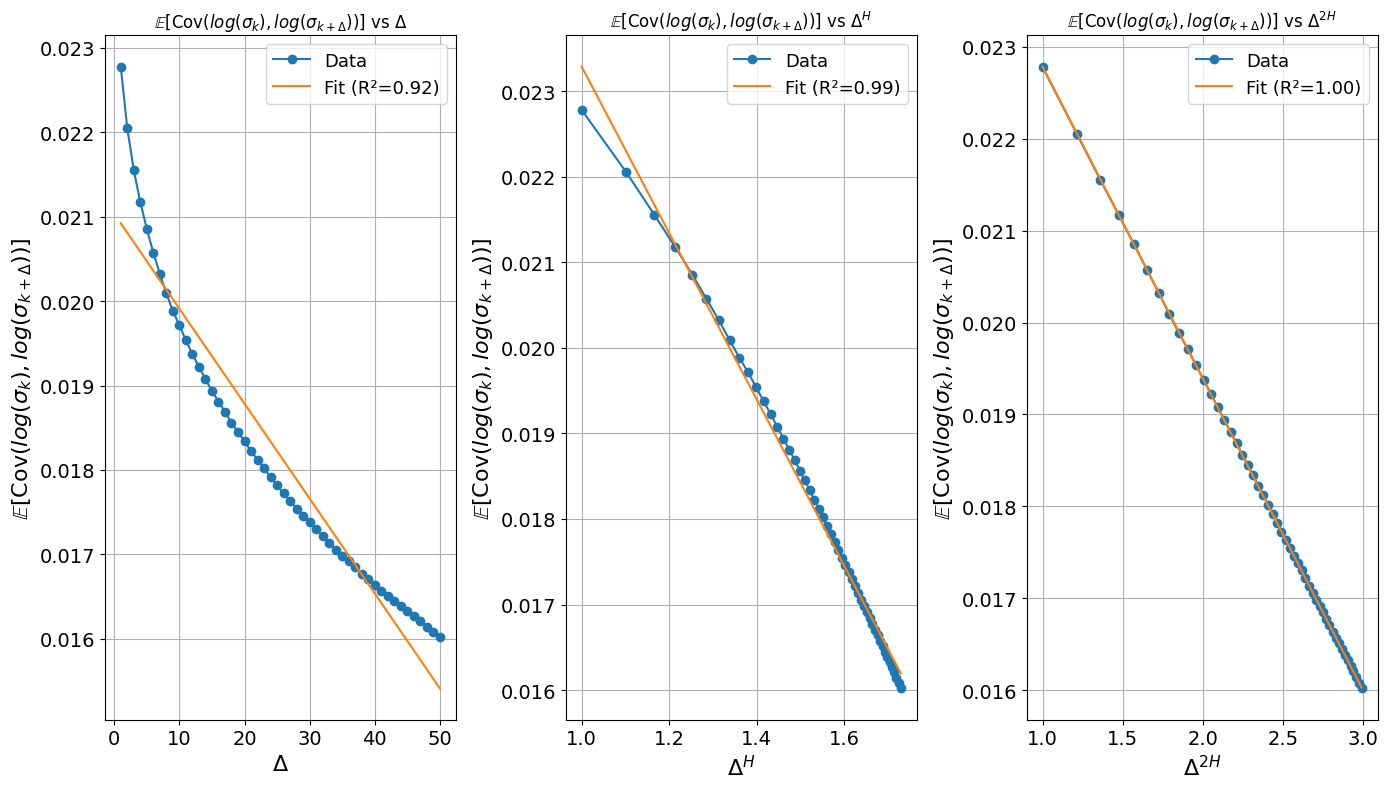

In [ ]:
# Define a function to calculate covariance
def covariance(x, y):
    return np.mean((x - np.mean(x)) * (y - np.mean(y)))

max_delta = 50  # You can adjust this value
delta_values = range(1, max_delta + 1)

H = 0.14

delta_H = np.array(delta_values) ** H
delta_2H = np.array(delta_values) ** (2 * H)

# Function to compute R^2
def compute_r2(x, y, fit):
    y_fit = np.polyval(fit, x)
    ss_res = np.sum((y - y_fit) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    return 1 - (ss_res / ss_tot)


# Calculate E(Cov(X_k, X_k+delta)) for each delta
cov_Xk_Xk_delta = []

for delta in delta_values:
    covariance_values = []
    for trajectory in all_the_trajectories:
        valid_indices = np.arange(n - delta - 1)  # Convert range to numpy array
        cov_value = covariance(trajectory[valid_indices], trajectory[valid_indices + delta])
        covariance_values.append(cov_value)
    cov_Xk_Xk_delta.append(np.mean(covariance_values))

# Calculate E(Cov(X_k, X_k+delta)) as a function of delta^H and delta^(2H)
cov_Xk_Xk_delta_H = []
cov_Xk_Xk_delta_2H = []

for delta in delta_values:
    covariance_values = []
    for trajectory in all_the_trajectories:
        valid_indices = np.arange(n - delta - 1)
        cov_value = covariance(trajectory[valid_indices], trajectory[valid_indices + delta])
        covariance_values.append(cov_value)
    cov_Xk_Xk_delta_H.append(np.mean(covariance_values))
    cov_Xk_Xk_delta_2H.append(np.mean(covariance_values))

# Linear fits
fit_cov_delta = np.polyfit(delta_values, cov_Xk_Xk_delta, 1)
fit_cov_delta_H = np.polyfit(delta_H, cov_Xk_Xk_delta_H, 1)
fit_cov_delta_2H = np.polyfit(delta_2H, cov_Xk_Xk_delta_2H, 1)

# R^2 values
r2_cov_delta = compute_r2(delta_values, cov_Xk_Xk_delta, fit_cov_delta)
r2_cov_delta_H = compute_r2(delta_H, cov_Xk_Xk_delta_H, fit_cov_delta_H)
r2_cov_delta_2H = compute_r2(delta_2H, cov_Xk_Xk_delta_2H, fit_cov_delta_2H)

# Plot the results
plt.figure(figsize=(14, 8))

# Plot E(Cov(X_k, X_k+delta)) vs delta
plt.subplot(1, 3, 1)
plt.plot(delta_values, cov_Xk_Xk_delta, marker='o', label='Data')
plt.plot(delta_values, np.polyval(fit_cov_delta, delta_values), label=f'Fit (R²={r2_cov_delta:.2f})')
plt.xlabel(r'$\Delta$')
plt.ylabel(r'$\mathbb{E}[\text{Cov}(log(\sigma_k), log(\sigma_{k+\Delta}))]$')
plt.title(r'$\mathbb{E}[\text{Cov}(log(\sigma_k), log(\sigma_{k+\Delta}))]$ vs $\Delta$')
plt.legend()
plt.grid(True)

# Plot E(Cov(X_k, X_k+delta)) vs delta^H
plt.subplot(1, 3, 2)
plt.plot(delta_H, cov_Xk_Xk_delta_H, marker='o', label='Data')
plt.plot(delta_H, np.polyval(fit_cov_delta_H, delta_H), label=f'Fit (R²={r2_cov_delta_H:.2f})')
plt.xlabel(r'$\Delta^H$')
plt.ylabel(r'$\mathbb{E}[\text{Cov}(log(\sigma_k), log(\sigma_{k+\Delta}))]$')
plt.title(r'$\mathbb{E}[\text{Cov}(log(\sigma_k), log(\sigma_{k+\Delta}))]$ vs $\Delta^H$')
plt.legend()
plt.grid(True)

# Plot E(Cov(X_k, X_k+delta)) vs delta^(2H)
plt.subplot(1, 3, 3)
plt.plot(delta_2H, cov_Xk_Xk_delta_2H, marker='o', label='Data')
plt.plot(delta_2H, np.polyval(fit_cov_delta_2H, delta_2H), label=f'Fit (R²={r2_cov_delta_2H:.2f})')
plt.xlabel(r'$\Delta^{2H}$')
plt.ylabel(r'$\mathbb{E}[\text{Cov}(log(\sigma_k), log(\sigma_{k+\Delta}))]$')
plt.title(r'$\mathbb{E}[\text{Cov}(log(\sigma_k), log(\sigma_{k+\Delta}))]$ vs $\Delta^{2H}$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


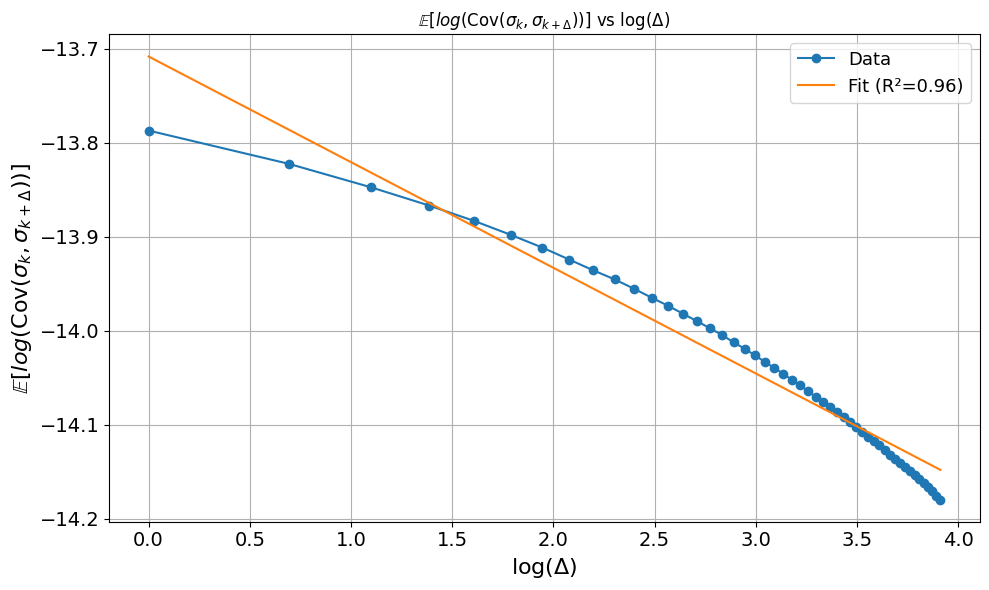

In [ ]:
# Define a function to calculate covariance
def covariance(x, y):
    return np.mean((x - np.mean(x)) * (y - np.mean(y)))

max_delta = 50  # You can adjust this value
delta_values = range(1, max_delta + 1)

H = 0.14

delta_H = np.array(delta_values) ** H
delta_2H = np.array(delta_values) ** (2 * H)

# Function to compute R^2
def compute_r2(x, y, fit):
    y_fit = np.polyval(fit, x)
    ss_res = np.sum((y - y_fit) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    return 1 - (ss_res / ss_tot)


# Calculate E(Cov(exp(X_k), exp(X_k+delta))) for each delta
cov_exp_Xk_exp_Xk_delta_log = []

for delta in delta_values:
    covariance_values = []
    for trajectory in all_the_trajectories:
        valid_indices = np.arange(n - delta - 1)  # Convert range to numpy array
        exp_Xk = np.exp(trajectory[valid_indices])
        exp_Xk_delta = np.exp(trajectory[valid_indices + delta])
        cov_value = covariance(exp_Xk, exp_Xk_delta)
        covariance_values.append(cov_value)
    cov_exp_Xk_exp_Xk_delta_log.append(np.mean(np.log(covariance_values)))

# Calculate log(delta) values
log_delta_values = np.log(delta_values)

# Linear fit
fit_cov_exp_log_delta = np.polyfit(log_delta_values, cov_exp_Xk_exp_Xk_delta_log, 1)

# R^2 value
r2_cov_exp_log_delta = compute_r2(log_delta_values, cov_exp_Xk_exp_Xk_delta_log, fit_cov_exp_log_delta)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot E(Cov(exp(X_k), exp(X_k+delta))) vs log(delta)
plt.plot(log_delta_values, cov_exp_Xk_exp_Xk_delta_log, marker='o', label='Data')
plt.plot(log_delta_values, np.polyval(fit_cov_exp_log_delta, log_delta_values), label=f'Fit (R²={r2_cov_exp_log_delta:.2f})')
plt.xlabel(r'$\log(\Delta)$')
plt.ylabel(r'$\mathbb{E}[log(\text{Cov}(\sigma_k, \sigma_{k+\Delta}))]$')
plt.title(r'$\mathbb{E}[log(\text{Cov}(\sigma_k, \sigma_{k+\Delta}))]$ vs $\log(\Delta)$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


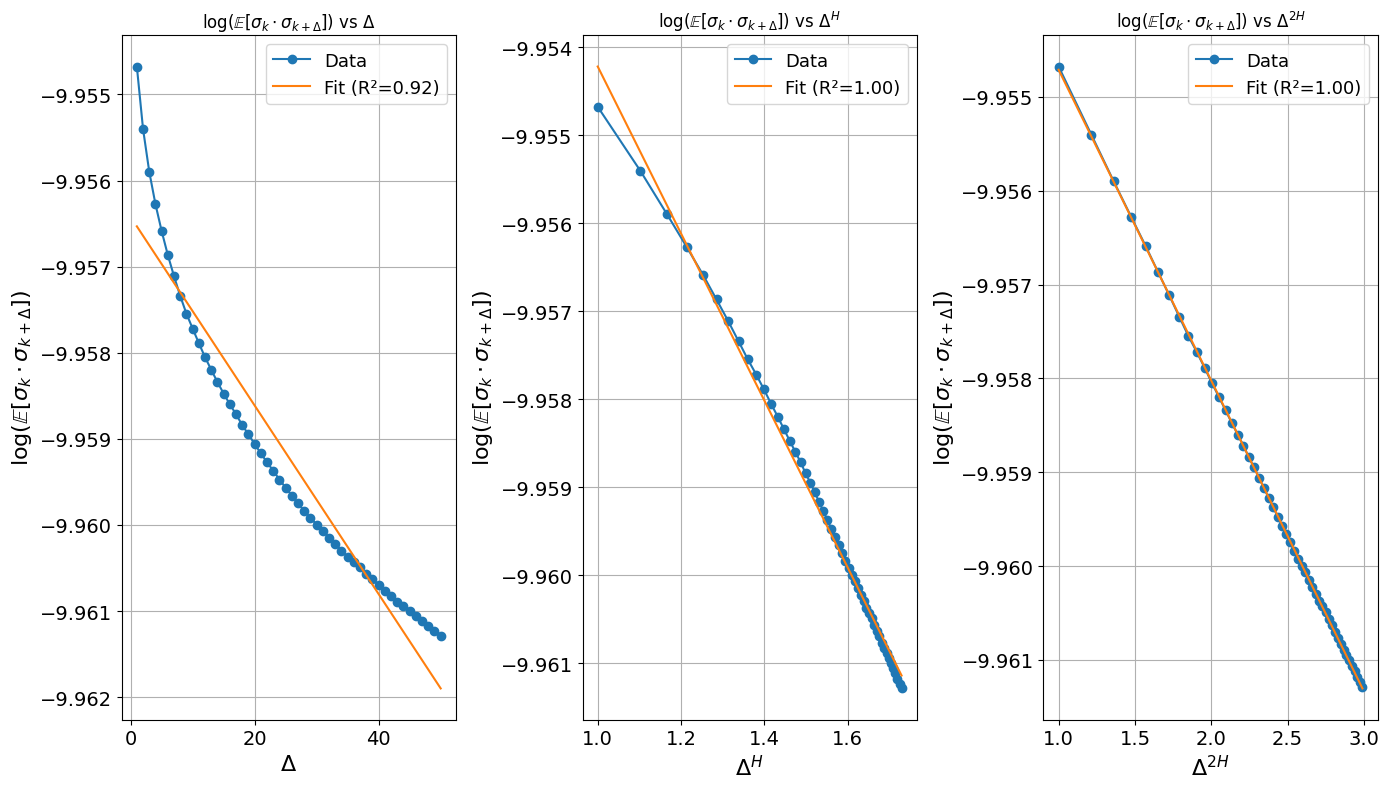

In [ ]:
# Calculate log(E(exp(X_k) * exp(X_k+delta))) for each delta
log_exp_Xk_exp_Xk_delta = []

for delta in delta_values:
    expectation_values = []
    for trajectory in all_the_trajectories:
        valid_indices = np.arange(n - delta - 1)  # Convert range to numpy array
        exp_Xk = np.exp(trajectory[valid_indices])
        exp_Xk_delta = np.exp(trajectory[valid_indices + delta])
        exp_value = np.mean(exp_Xk * exp_Xk_delta)
        expectation_values.append(exp_value)
    log_exp_Xk_exp_Xk_delta.append(np.log(np.mean(expectation_values)))

# Calculate log(E(exp(X_k) * exp(X_k+delta))) as a function of delta^H and delta^(2H)
log_exp_Xk_exp_Xk_delta_H = []
log_exp_Xk_exp_Xk_delta_2H = []

for delta in delta_values:
    expectation_values = []
    for trajectory in all_the_trajectories:
        valid_indices = np.arange(n - delta - 1)
        exp_Xk = np.exp(trajectory[valid_indices])
        exp_Xk_delta = np.exp(trajectory[valid_indices + delta])
        exp_value = np.mean(exp_Xk * exp_Xk_delta)
        expectation_values.append(exp_value)
    log_exp_Xk_exp_Xk_delta_H.append(np.log(np.mean(expectation_values)))
    log_exp_Xk_exp_Xk_delta_2H.append(np.log(np.mean(expectation_values)))

# Linear fits
fit_log_exp_delta = np.polyfit(delta_values, log_exp_Xk_exp_Xk_delta, 1)
fit_log_exp_delta_H = np.polyfit(delta_H, log_exp_Xk_exp_Xk_delta_H, 1)
fit_log_exp_delta_2H = np.polyfit(delta_2H, log_exp_Xk_exp_Xk_delta_2H, 1)

# R^2 values
r2_log_exp_delta = compute_r2(delta_values, log_exp_Xk_exp_Xk_delta, fit_log_exp_delta)
r2_log_exp_delta_H = compute_r2(delta_H, log_exp_Xk_exp_Xk_delta_H, fit_log_exp_delta_H)
r2_log_exp_delta_2H = compute_r2(delta_2H, log_exp_Xk_exp_Xk_delta_2H, fit_log_exp_delta_2H)

# Plot the results
plt.figure(figsize=(14, 8))

# Plot log(E(exp(X_k) * exp(X_k+delta))) vs delta
plt.subplot(1, 3, 1)
plt.plot(delta_values, log_exp_Xk_exp_Xk_delta, marker='o', label='Data')
plt.plot(delta_values, np.polyval(fit_log_exp_delta, delta_values), label=f'Fit (R²={r2_log_exp_delta:.2f})')
plt.xlabel(r'$\Delta$')
plt.ylabel(r'$\log(\mathbb{E}[\sigma_k \cdot \sigma_{k+\Delta}])$')
plt.title(r'$\log(\mathbb{E}[\sigma_k \cdot \sigma_{k+\Delta}])$ vs $\Delta$')
plt.legend()
plt.grid(True)

# Plot log(E(exp(X_k) * exp(X_k+delta))) vs delta^H
plt.subplot(1, 3, 2)
plt.plot(delta_H, log_exp_Xk_exp_Xk_delta_H, marker='o', label='Data')
plt.plot(delta_H, np.polyval(fit_log_exp_delta_H, delta_H), label=f'Fit (R²={r2_log_exp_delta_H:.2f})')
plt.xlabel(r'$\Delta^H$')
plt.ylabel(r'$\log(\mathbb{E}[\sigma_k \cdot \sigma_{k+\Delta}])$')
plt.title(r'$\log(\mathbb{E}[\sigma_k \cdot \sigma_{k+\Delta}])$ vs $\Delta^H$')
plt.legend()
plt.grid(True)

# Plot log(E(exp(X_k) * exp(X_k+delta))) vs delta^(2H)
plt.subplot(1, 3, 3)
plt.plot(delta_2H, log_exp_Xk_exp_Xk_delta_2H, marker='o', label='Data')
plt.plot(delta_2H, np.polyval(fit_log_exp_delta_2H, delta_2H), label=f'Fit (R²={r2_log_exp_delta_2H:.2f})')
plt.xlabel(r'$\Delta^{2H}$')
plt.ylabel(r'$\log(\mathbb{E}[\sigma_k \cdot \sigma_{k+\Delta}])$')
plt.title(r'$\log(\mathbb{E}[\sigma_k \cdot \sigma_{k+\Delta}])$ vs $\Delta^{2H}$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## With real data

In [ ]:
# Assurer que la colonne 'Realized Kernel' contient uniquement des valeurs numériques
volatility['Realized Kernel'] = pd.to_numeric(volatility['Realized Kernel'], errors='coerce')

# Supprimer les lignes avec des NaN dans la colonne 'Realized Kernel'
volatility.dropna(subset=['Realized Kernel'], inplace=True)

# Calculer la log-volatilité
volatility['sqrt'] = np.sqrt(volatility['Realized Kernel'])
volatility['log_sqrt'] = np.log(volatility['sqrt'])

# Extraire la log-volatilité
log_volatility = volatility['log_sqrt'].values

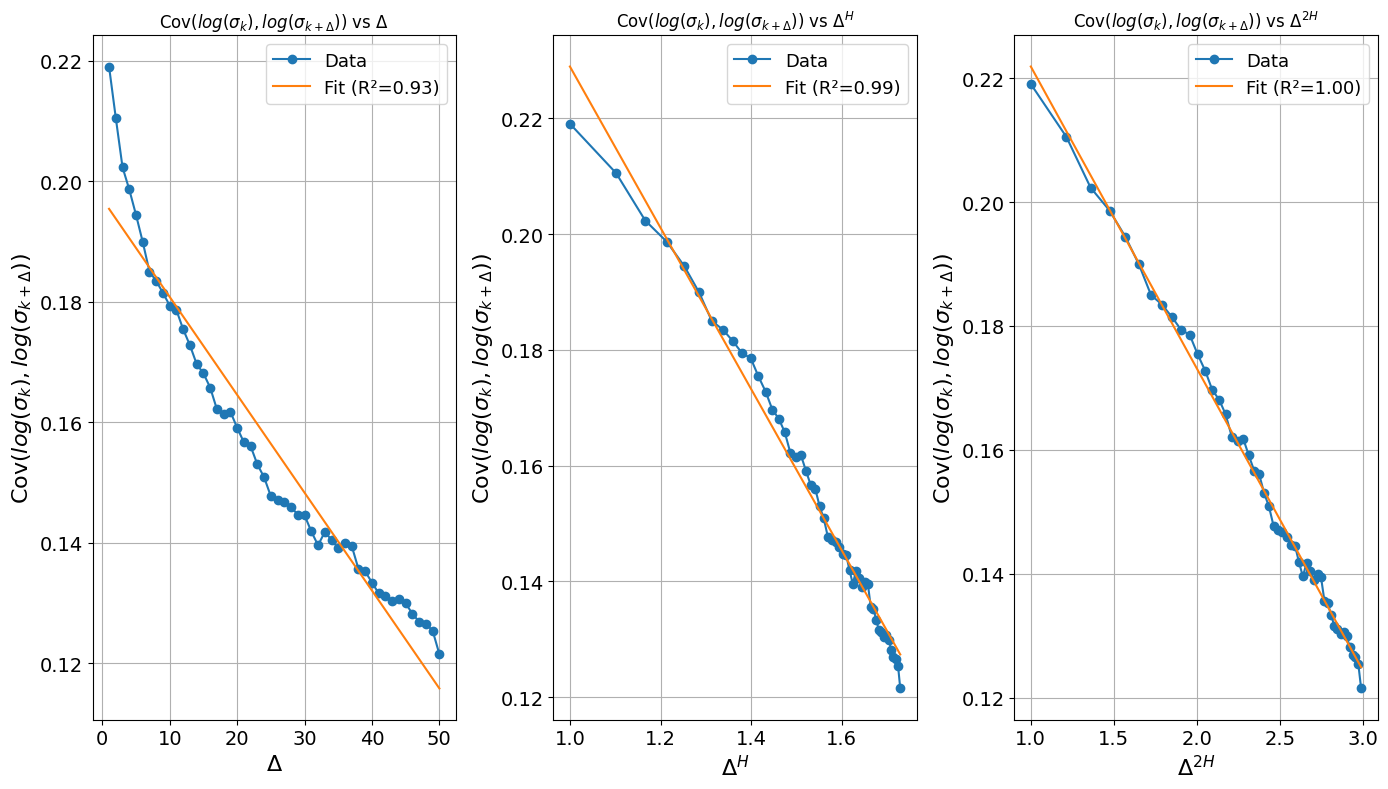

In [ ]:
trajectory = np.array(volatility['log_sqrt'])

def covariance(x, y):
    return np.mean((x - np.mean(x)) * (y - np.mean(y)))

# Calculate E(Cov(X_k, X_k+delta)) for each delta
cov_Xk_Xk_delta = []
cov_Xk_Xk_delta_H = []
cov_Xk_Xk_delta_2H = []

for delta in delta_values:
    
    
    valid_indices = np.arange(len(trajectory) - delta - 1)  # Convert range to numpy array
    cov_value = covariance(trajectory[valid_indices], trajectory[valid_indices + delta])
    
    cov_Xk_Xk_delta.append(cov_value)
    cov_Xk_Xk_delta_H.append(cov_value)
    cov_Xk_Xk_delta_2H.append(cov_value)

# Calculate E(Cov(X_k, X_k+delta)) as a function of delta^H and delta^(2H)


# Linear fits
fit_cov_delta = np.polyfit(delta_values, cov_Xk_Xk_delta, 1)
fit_cov_delta_H = np.polyfit(delta_H, cov_Xk_Xk_delta_H, 1)
fit_cov_delta_2H = np.polyfit(delta_2H, cov_Xk_Xk_delta_2H, 1)

# R^2 values
r2_cov_delta = compute_r2(delta_values, cov_Xk_Xk_delta, fit_cov_delta)
r2_cov_delta_H = compute_r2(delta_H, cov_Xk_Xk_delta_H, fit_cov_delta_H)
r2_cov_delta_2H = compute_r2(delta_2H, cov_Xk_Xk_delta_2H, fit_cov_delta_2H)

# Plot the results
plt.figure(figsize=(14, 8))

# Plot E(Cov(X_k, X_k+delta)) vs delta
plt.subplot(1, 3, 1)
plt.plot(delta_values, cov_Xk_Xk_delta, marker='o', label='Data')
plt.plot(delta_values, np.polyval(fit_cov_delta, delta_values), label=f'Fit (R²={r2_cov_delta:.2f})')
plt.xlabel(r'$\Delta$')
plt.ylabel(r'$\text{Cov}(log(\sigma_k), log(\sigma_{k+\Delta}))$')
plt.title(r'$\text{Cov}(log(\sigma_k), log(\sigma_{k+\Delta}))$ vs $\Delta$')
plt.legend()
plt.grid(True)

# Plot E(Cov(X_k, X_k+delta)) vs delta^H
plt.subplot(1, 3, 2)
plt.plot(delta_H, cov_Xk_Xk_delta_H, marker='o', label='Data')
plt.plot(delta_H, np.polyval(fit_cov_delta_H, delta_H), label=f'Fit (R²={r2_cov_delta_H:.2f})')
plt.xlabel(r'$\Delta^H$')
plt.ylabel(r'$\text{Cov}(log(\sigma_k), log(\sigma_{k+\Delta}))$')
plt.title(r'$\text{Cov}(log(\sigma_k), log(\sigma_{k+\Delta}))$ vs $\Delta^H$')
plt.legend()
plt.grid(True)

# Plot E(Cov(X_k, X_k+delta)) vs delta^(2H)
plt.subplot(1, 3, 3)
plt.plot(delta_2H, cov_Xk_Xk_delta_2H, marker='o', label='Data')
plt.plot(delta_2H, np.polyval(fit_cov_delta_2H, delta_2H), label=f'Fit (R²={r2_cov_delta_2H:.2f})')
plt.xlabel(r'$\Delta^{2H}$')
plt.ylabel(r'$\text{Cov}(log(\sigma_k), log(\sigma_{k+\Delta}))$')
plt.title(r'$\text{Cov}(log(\sigma_k), log(\sigma_{k+\Delta}))$ vs $\Delta^{2H}$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


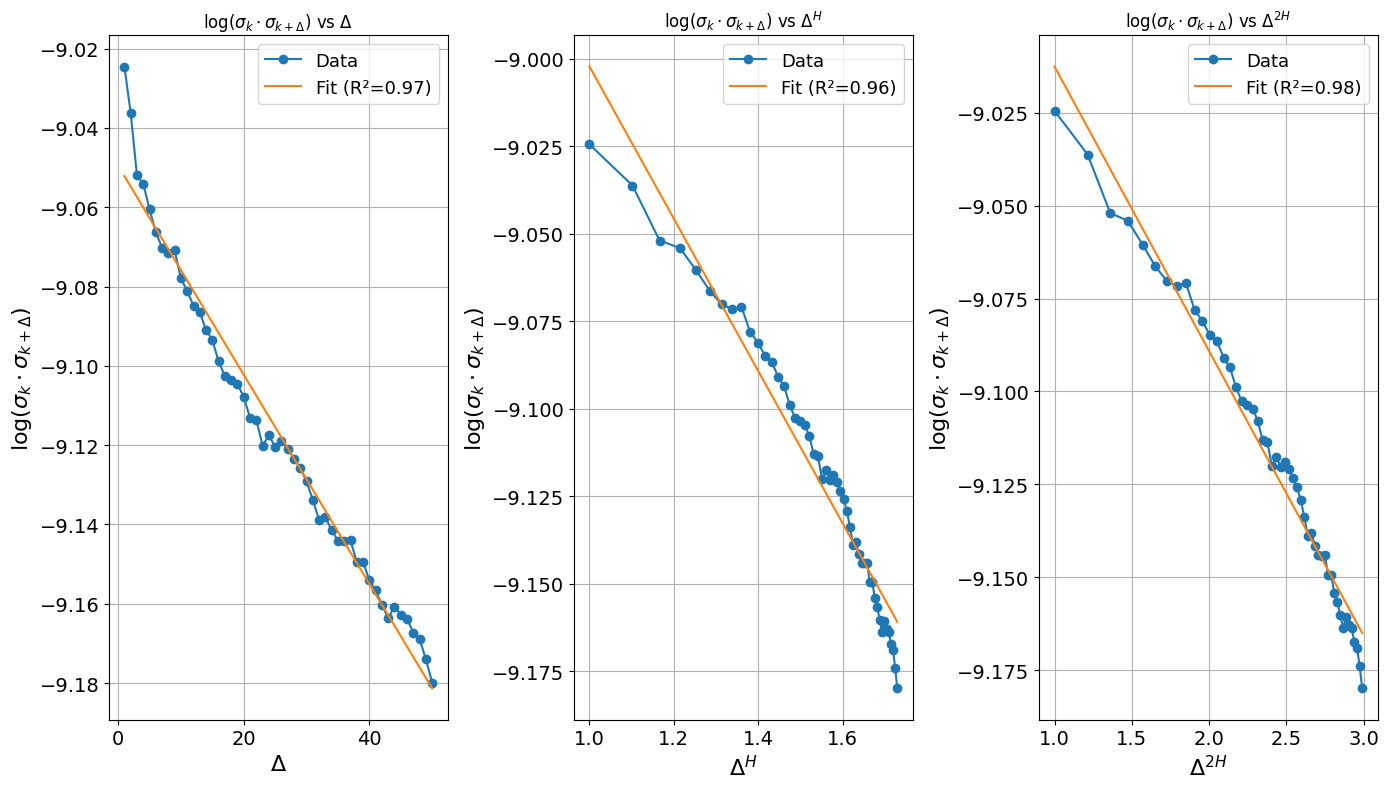

In [ ]:
trajectory = np.array(volatility['log_sqrt'])

# Calculate log(E(exp(X_k) * exp(X_k+delta))) for each delta
log_exp_Xk_exp_Xk_delta = []
log_exp_Xk_exp_Xk_delta_H = []
log_exp_Xk_exp_Xk_delta_2H = []

for delta in delta_values:
    expectation_values = []

    valid_indices = np.arange(len(trajectory) - delta - 1)  # Convert range to numpy array
    exp_Xk = np.exp(trajectory[valid_indices])
    exp_Xk_delta = np.exp(trajectory[valid_indices + delta])
    exp_value = np.mean(exp_Xk * exp_Xk_delta)
    
    log_exp_Xk_exp_Xk_delta.append(np.log(exp_value))
    log_exp_Xk_exp_Xk_delta_H.append(np.log(exp_value))
    log_exp_Xk_exp_Xk_delta_2H.append(np.log(exp_value))

# Calculate log(E(exp(X_k) * exp(X_k+delta))) as a function of delta^H and delta^(2H)



# Linear fits
fit_log_exp_delta = np.polyfit(delta_values, log_exp_Xk_exp_Xk_delta, 1)
fit_log_exp_delta_H = np.polyfit(delta_H, log_exp_Xk_exp_Xk_delta_H, 1)
fit_log_exp_delta_2H = np.polyfit(delta_2H, log_exp_Xk_exp_Xk_delta_2H, 1)

# R^2 values
r2_log_exp_delta = compute_r2(delta_values, log_exp_Xk_exp_Xk_delta, fit_log_exp_delta)
r2_log_exp_delta_H = compute_r2(delta_H, log_exp_Xk_exp_Xk_delta_H, fit_log_exp_delta_H)
r2_log_exp_delta_2H = compute_r2(delta_2H, log_exp_Xk_exp_Xk_delta_2H, fit_log_exp_delta_2H)

# Plot the results
plt.figure(figsize=(14, 8))

# Plot log(E(exp(X_k) * exp(X_k+delta))) vs delta
plt.subplot(1, 3, 1)
plt.plot(delta_values, log_exp_Xk_exp_Xk_delta, marker='o', label='Data')
plt.plot(delta_values, np.polyval(fit_log_exp_delta, delta_values), label=f'Fit (R²={r2_log_exp_delta:.2f})')
plt.xlabel(r'$\Delta$')
plt.ylabel(r'$\log(\sigma_k \cdot \sigma_{k+\Delta})$')
plt.title(r'$\log(\sigma_k \cdot \sigma_{k+\Delta})$ vs $\Delta$')
plt.legend()
plt.grid(True)

# Plot log(E(exp(X_k) * exp(X_k+delta))) vs delta^H
plt.subplot(1, 3, 2)
plt.plot(delta_H, log_exp_Xk_exp_Xk_delta_H, marker='o', label='Data')
plt.plot(delta_H, np.polyval(fit_log_exp_delta_H, delta_H), label=f'Fit (R²={r2_log_exp_delta_H:.2f})')
plt.xlabel(r'$\Delta^H$')
plt.ylabel(r'$\log(\sigma_k \cdot \sigma_{k+\Delta})$')
plt.title(r'$\log(\sigma_k \cdot \sigma_{k+\Delta})$ vs $\Delta^H$')
plt.legend()
plt.grid(True)

# Plot log(E(exp(X_k) * exp(X_k+delta))) vs delta^(2H)
plt.subplot(1, 3, 3)
plt.plot(delta_2H, log_exp_Xk_exp_Xk_delta_2H, marker='o', label='Data')
plt.plot(delta_2H, np.polyval(fit_log_exp_delta_2H, delta_2H), label=f'Fit (R²={r2_log_exp_delta_2H:.2f})')
plt.xlabel(r'$\Delta^{2H}$')
plt.ylabel(r'$\log(\sigma_k \cdot \sigma_{k+\Delta})$')
plt.title(r'$\log(\sigma_k \cdot \sigma_{k+\Delta})$ vs $\Delta^{2H}$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


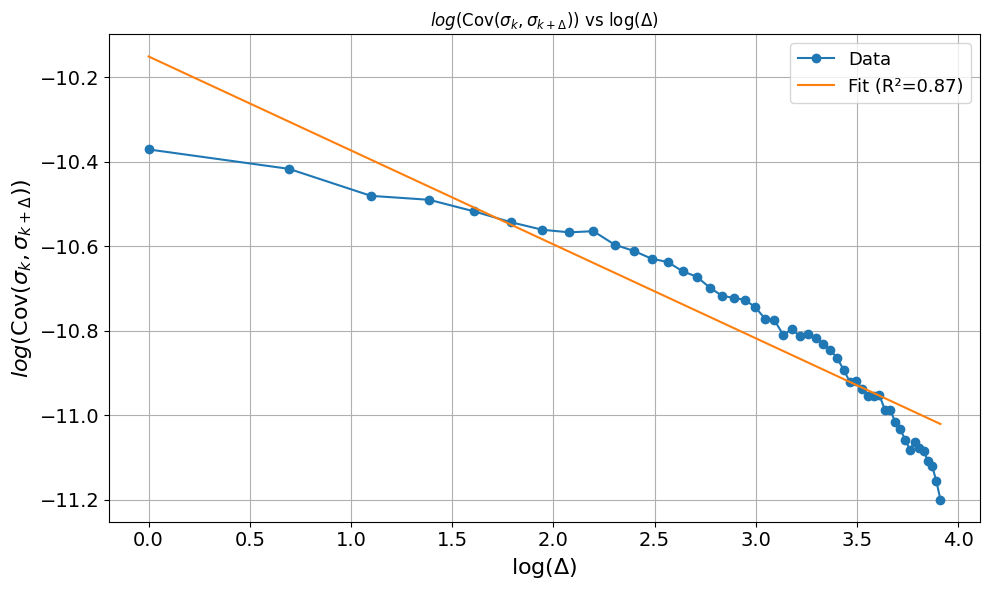

In [ ]:
trajectory = np.array(volatility['log_sqrt'])

max_delta = 50 
delta_values = range(1, max_delta + 1)


# Calculate E(Cov(exp(X_k), exp(X_k+delta))) for each delta
cov_exp_Xk_exp_Xk_delta_log = []

for delta in delta_values:
    covariance_values = []
    
    valid_indices = np.arange(len(trajectory) - delta - 1)  # Convert range to numpy array
    exp_Xk = np.exp(trajectory[valid_indices])
    exp_Xk_delta = np.exp(trajectory[valid_indices + delta])
    cov_value = covariance(exp_Xk, exp_Xk_delta)
    
    cov_exp_Xk_exp_Xk_delta_log.append(np.log(cov_value))

# Calculate log(delta) values
log_delta_values = np.log(delta_values)

# Linear fit
fit_cov_exp_log_delta = np.polyfit(log_delta_values, cov_exp_Xk_exp_Xk_delta_log, 1)

# R^2 value
r2_cov_exp_log_delta = compute_r2(log_delta_values, cov_exp_Xk_exp_Xk_delta_log, fit_cov_exp_log_delta)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot E(Cov(exp(X_k), exp(X_k+delta))) vs log(delta)
plt.plot(log_delta_values, cov_exp_Xk_exp_Xk_delta_log, marker='o', label='Data')
plt.plot(log_delta_values, np.polyval(fit_cov_exp_log_delta, log_delta_values), label=f'Fit (R²={r2_cov_exp_log_delta:.2f})')
plt.xlabel(r'$\log(\Delta)$')
plt.ylabel(r'$log(\text{Cov}(\sigma_k, \sigma_{k+\Delta}))$')
plt.title(r'$log(\text{Cov}(\sigma_k, \sigma_{k+\Delta}))$ vs $\log(\Delta)$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Prediction

Performance of Rough Volatility model (P_rv): 3.4620345563791433
Performance of Simple Moving Average model (P_sma): 0.08932888225609122


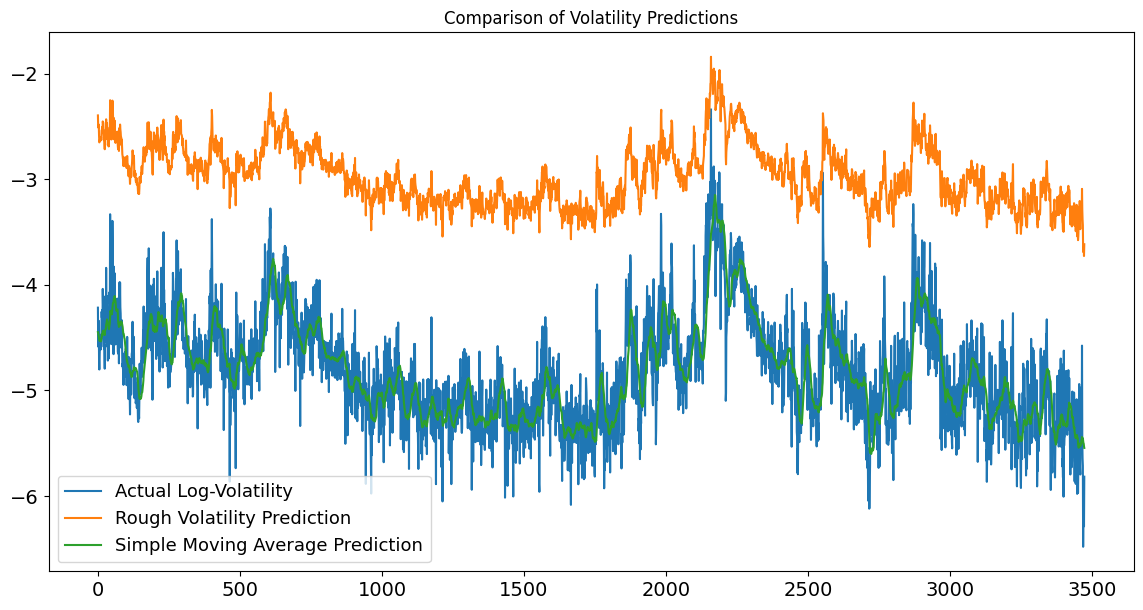

In [60]:

# Assurer que la colonne 'Realized Kernel' contient uniquement des valeurs numériques
volatility['Realized Kernel'] = pd.to_numeric(volatility['Realized Kernel'], errors='coerce')

# Supprimer les lignes avec des NaN dans la colonne 'Realized Kernel'
volatility.dropna(subset=['Realized Kernel'], inplace=True)

# Calculer la log-volatilité
volatility['sqrt'] = np.sqrt(volatility['Realized Kernel'])
volatility['log_sqrt'] = np.log(volatility['sqrt'])

# Extraire la log-volatilité
log_volatility = volatility['log_sqrt'].values

# Fonction de prédiction de volatilité rugueuse
def rough_volatility_prediction(log_volatility, H, Delta):
    cos_Hpi = np.cos(H * np.pi)
    constant = cos_Hpi / np.pi * Delta**(H + 1/2)
    N = len(log_volatility)
    
    predictions = []
    for t in range(N):
        summation = 0
        for k in range(t + 1):
            summation += log_volatility[t - k] / ((k + Delta + 1/2) * (k + 1/2)**(H + 1/2))
        prediction = constant * summation
        predictions.append(prediction)
    
    return np.array(predictions)

# Paramètres
H = 0.14667  
Delta = 1

# Prédiction de volatilité rugueuse
predictions_rv = rough_volatility_prediction(log_volatility, H, Delta)

# Comparaison avec d'autres méthodes (par exemple, moyenne mobile simple)
window_size = 20
predictions_sma = pd.Series(log_volatility).rolling(window=window_size).mean().to_numpy()

# S'assurer que les prédictions sont alignées
predictions_rv = predictions_rv[window_size - 1:]
predictions_sma = predictions_sma[window_size - 1:]
actual = log_volatility[window_size - 1:]

# Calculer la métrique de performance P
P_rv = mean_squared_error(actual, predictions_rv)
P_sma = mean_squared_error(actual, predictions_sma)

print(f"Performance of Rough Volatility model (P_rv): {P_rv}")
print(f"Performance of Simple Moving Average model (P_sma): {P_sma}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(actual, label="Actual Log-Volatility")
plt.plot(predictions_rv, label="Rough Volatility Prediction")
plt.plot(predictions_sma, label="Simple Moving Average Prediction")
plt.legend()
plt.title("Comparison of Volatility Predictions")
plt.show()


As we can see on the graph above, there is on our prediction a vertical difference. However, the general appearance seems to be satisfaying. We will adjust with the mean squared error the prediction in order to be more accurate.

1.6193571758837044


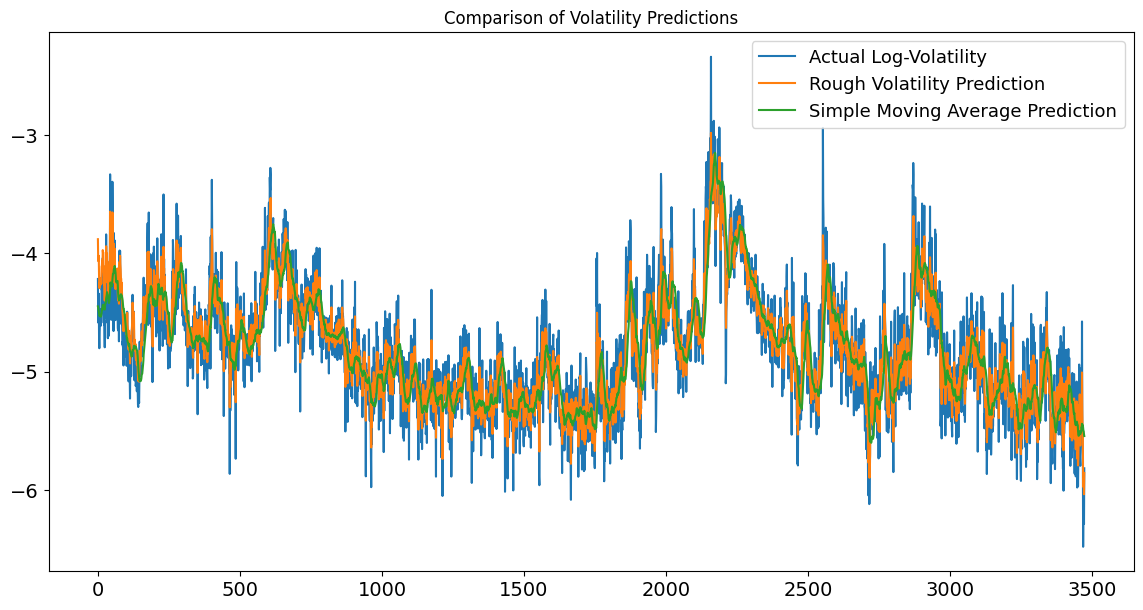

In [61]:
a = np.mean(np.abs(actual/predictions_rv))
print(a)
predictions_rv_true = a * predictions_rv
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(actual, label="Actual Log-Volatility")
plt.plot(predictions_rv_true, label="Rough Volatility Prediction")
plt.plot(predictions_sma, label="Simple Moving Average Prediction")
plt.legend()
plt.title("Comparison of Volatility Predictions")
plt.show()

Now our prediction is completed, and can be used with a satisfied accuracy

## Trading Strategy

In [64]:
# Extract the true variance (realized variance) and estimated variance for the specified range
min_length = min(len(volatility['log_sqrt']), len(predictions_rv_true))

volatility2 = volatility[:min_length]
predictions_rv_true2 = predictions_rv_true[:min_length]

true_variance = volatility2['log_sqrt']
estimated_variance = predictions_rv_true2

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(true_variance, estimated_variance)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(true_variance, estimated_variance)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((true_variance - estimated_variance) / true_variance)) * 100

# Calculate Root Mean Squared Percentage Error (RMSPE)
rmspe = np.sqrt(np.mean(((true_variance - estimated_variance) / true_variance) ** 2)) * 100

# Calculate R-squared (R^2)
r2 = r2_score(true_variance, estimated_variance)

# Calculate Akaike Information Criterion (AIC)
n = len(true_variance)
residual = true_variance - estimated_variance
sse = np.sum(residual ** 2)
aic = n * np.log(sse / n) + 2 * 2

# Calculate Bayesian Information Criterion (BIC)
bic = n * np.log(sse / n) + 2 * np.log(n)

# Calculate Quasi-Likelihood Information Criterion (QLIKE)
qlike = np.mean(true_variance / estimated_variance - np.log(true_variance / estimated_variance) - 1)

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Percentage Error (RMSPE):", rmspe)
print("R-squared (R^2):", r2)
print("Akaike Information Criterion (AIC):", aic)
print("Bayesian Information Criterion (BIC):", bic)
print("Quasi-Likelihood Information Criterion (QLIKE):", qlike)


Mean Squared Error (MSE): 0.1468964506471678
Root Mean Squared Error (RMSE): 0.3832707276158301
Mean Absolute Error (MAE): 0.2952733832317064
Mean Absolute Percentage Error (MAPE): 6.306378337567518
Root Mean Squared Percentage Error (RMSPE): 8.417550644136842
R-squared (R^2): 0.44694264318130095
Akaike Information Criterion (AIC): -6657.309013598044
Bayesian Information Criterion (BIC): -6645.003465492556
Quasi-Likelihood Information Criterion (QLIKE): 0.0034279577469857716


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['VXX']: YFChartError("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1388466000")


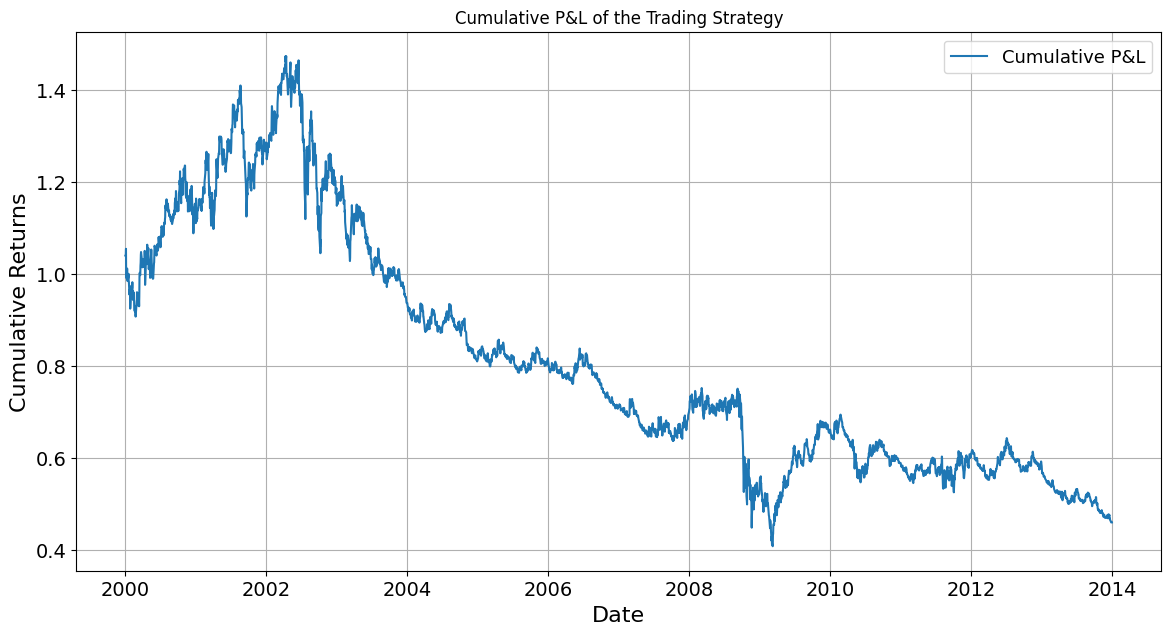

Sharpe Ratio: -0.16020890801854576
Max Drawdown: -0.722945399976944


In [68]:
# Download data
spy = yf.download('SPY', start='2000-01-01', end='2013-12-31')  
vxx = yf.download('VXX', start='2000-01-01', end='2013-12-31')

# Preprocessing
spy = spy['Adj Close']
vxx = vxx['Adj Close']

# Volatility prediction logic (from the notebook)
volatility_signal = spy.pct_change().rolling(window=10).std()

# Trading signal
trading_signal = np.where(volatility_signal > volatility_signal.mean(), 1, -1)

# Calculate returns
spy_returns = spy.pct_change()
strategy_returns = trading_signal[:-1] * spy_returns[1:]

# Cumulative P&L
cumulative_pnl = (1 + strategy_returns).cumprod()

# Sharpe Ratio
sharpe_ratio = strategy_returns.mean() / strategy_returns.std() * np.sqrt(252)

# Drawdown
rolling_max = cumulative_pnl.cummax()
drawdown = cumulative_pnl / rolling_max - 1
max_drawdown = drawdown.min()

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(cumulative_pnl, label='Cumulative P&L')
plt.title('Cumulative P&L of the Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Display key metrics
print("Sharpe Ratio:", sharpe_ratio)
print("Max Drawdown:", max_drawdown)


### Strategies

In [69]:
spy1 = yf.download('SPY', start='2000-01-01', end='2023-01-01')  

[*********************100%%**********************]  1 of 1 completed


### Stategy 1  : moving average crossover strategy 

In [70]:
def MA_CS(X,short_window,long_window):
    X['SMA_short']= X['Close'].rolling(window=short_window, min_periods=1).mean() 
    X['SMA_long']= X['Close'].rolling(window=long_window, min_periods=1).mean()
    X['alpha']=np.where( X['SMA_short']>X['SMA_long'], -1,1)
    X['returns'] = X['Close'].pct_change()
    X['strategy_returns'] = X['alpha'].shift(1) * X['returns']
    X['cumulative_pnl'] = (1 + X['strategy_returns']).cumprod() - 1


This strategy is based on a comparaision of the average closing price over a short period and a long period (periods finishing at the time where we want to calculate the return). If the average closing price over a short period is lower than the one over the long period, then we want to buy the stock (alpha=1) beacuse it means its price is reducing more than usual, else we want to sell the stock(alpha=-1).

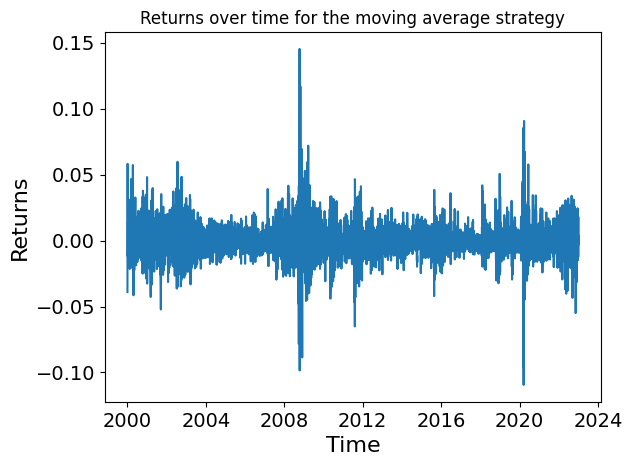

In [71]:
MA_CS(spy1,10,50)
plt.plot(spy1['strategy_returns'])
plt.title('Returns over time for the moving average strategy')
plt.ylabel('Returns')
plt.xlabel('Time')
plt.show()

We can see that the return fluctuates around 0. However, we can notice that there are particularly large spikes around 2008 and 2020, which correspond to a stock market crash and the Covid crisis. Volatility is very high around these times. 

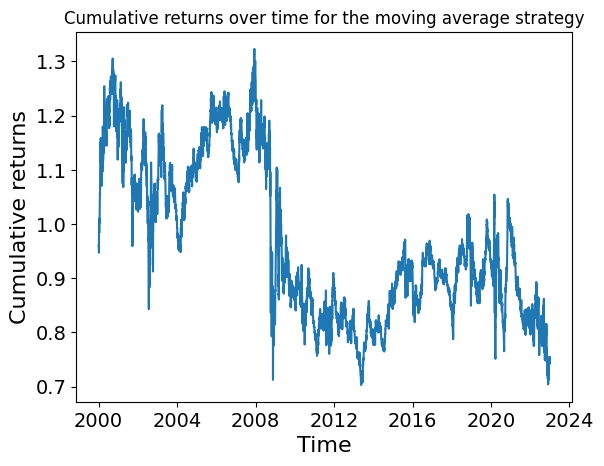

In [72]:
#We plot the cumulative returns 
cumulative_pnl = (np.array(1) + spy1['strategy_returns']).cumprod()
plt.plot(cumulative_pnl)
plt.title('Cumulative returns over time for the moving average strategy')
plt.ylabel('Cumulative returns')
plt.xlabel('Time')
plt.show()

Our stratgey looks efficient at start, but when the crash of 2008 occurs, the strategy is not efficient anymore. Indeed, during the crash, the strategy tells us to buy the stock, but that is not a good idea because the closing price is collapsing without going back to the mid value 0.

on utilise la volatilité pour savoir si on fait une action ou pas: si elle est grande on achète/vend 

### Strategy 2 : moving average crossover strategy  including volatilities 

We use the same strategy but this time, we will include volatilty. If the volatility is lower than a certain value k, we do not buy or sell any stocks. If it is higher, the strategy is the same as before. 

In [73]:
#We define the function 
def MA_CS_V(X,V,short_window,long_window,k):
    X['SMA_short']= X['Close'].rolling(window=short_window, min_periods=1).mean() 
    X['SMA_long']= X['Close'].rolling(window=long_window, min_periods=1).mean()
    X['alpha']=np.ones((len(X)))
    X['alpha'] = 0  # Initialise toutes les valeurs d'alpha à 0 par défaut
    for i in range(len(X)-1):
        if X['SMA_short'][i] > X['SMA_long'][i] and V[i] > k:
            X.loc[i, 'alpha'] = -1
        elif X['SMA_short'][i] < X['SMA_long'][i] and V[i] > k:
            X.loc[i, 'alpha'] = 1
    X['returns'] = X['Close'].pct_change()
    X['strategy_returns'] = X['alpha'].shift(1) * X['returns']



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


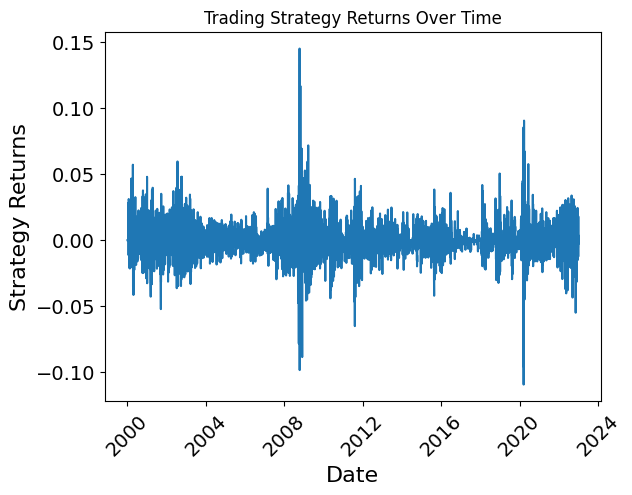

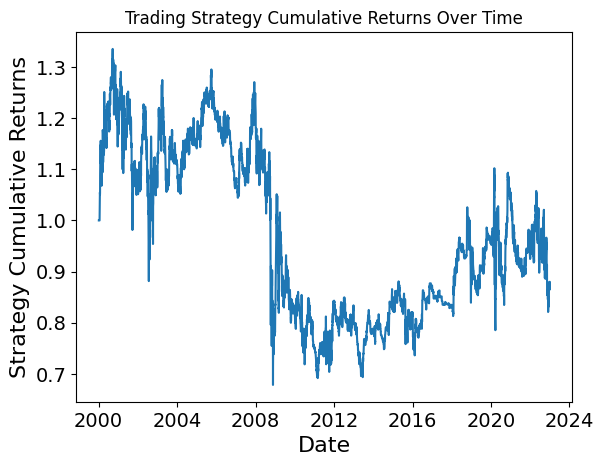

In [98]:
spy2= yf.download('SPY', start='2000-01-01', end='2023-01-01')  
spy2['Graham Klaus'] = np.sqrt((1/2)*(np.log(spy2['High']/spy2['Low'])**2) - (2*np.log(2) - 1)*(np.log(spy2['Close']/spy2['Open'])**2))


spy2.reset_index(drop=True, inplace=True)
MA_CS_V(spy2,spy2['Graham Klaus'],10,50,0.0040)

spydate= yf.download('SPY', start='2000-01-01', end='2023-01-01')  

plt.plot(spydate.index,spy2['strategy_returns'])
plt.xlabel('Date')
plt.ylabel('Strategy Returns')
plt.title('Trading Strategy Returns Over Time')
plt.xticks(rotation=45)  # Rotation des étiquettes d'axe x pour une meilleure lisibilité
plt.show()

cumulative_pnl = (np.array(1) + spy2['strategy_returns']).cumprod()
plt.plot(spydate.index, cumulative_pnl)
plt.xlabel('Date')
plt.ylabel('Strategy Cumulative Returns')
plt.title('Trading Strategy Cumulative Returns Over Time')
plt.show()



1.2745232340440098 0.015151515151515152


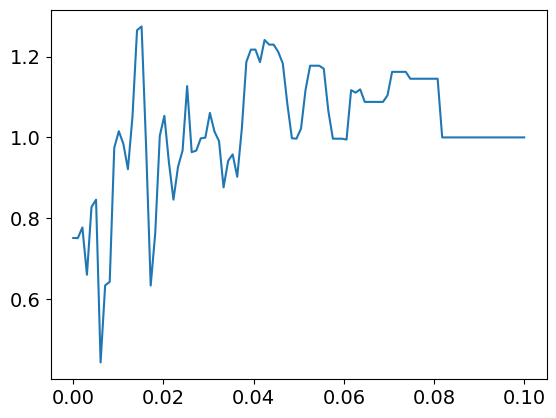

In [97]:
val_k_1 = np.linspace(-1,1,20)

val_k_2 = np.linspace(0,0.1,100)

resul = []

max_k=0
max_value=0
for k in val_k_2:
    MA_CS_V(spy2,spy2['Graham Klaus'],10,50,k)
    cumulative_pnl2 = (np.array(1) + spy2['strategy_returns']).cumprod()
    resul.append(cumulative_pnl2.values[-1])
    if cumulative_pnl2.values[-1] > max_value:
        max_value = cumulative_pnl2.values[-1]
        max_k=k

   

plt.plot(val_k_2,resul)
print(max_value, max_k)

### Strategy 3 : Bollinger Bands strategy

In [77]:
data= pd.read_csv('RealizedVarianceData.csv')
print(data.head())

   Unnamed: 0.1 Unnamed: 0 Realized Variance (5-minute)       Realized Kernel  \
0             0     DateID                      SPX2.rv               SPX2.rk   
1             1   20000103         0.000157239596459558  0.000160726642338866   
2             2   20000104         0.000298147448739244  0.000264396469319473   
3             3   20000105         0.000307225852905134  0.000304650302935347   
4             4   20000106         0.000136237904617473  0.000148582063339039   

                Return Realized Variance (5-minute using 1-minute subsamples)  \
0               SPX2.r                                         SPX2.rv5ss       
1  -0.0101036180817431                                0.00014410167533591       
2  -0.0392921825644033                               0.000219256477223869       
3  0.00174919456727718                               0.000297788864162233       
4  0.00106211984850368                               0.000136479949750481       

  Realized Variance (10-mi

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3744\832019791.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,25

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

spy3= yf.download('SPY', start='2000-01-01', end='2023-01-01')  
spy3['Graham Klaus'] = np.sqrt((1/2)*(np.log(spy3['High']/spy3['Low'])**2) - (2*np.log(2) - 1)*(np.log(spy3['Close']/spy3['Open'])**2))

print(spy3['Graham Klaus'])

[*********************100%%**********************]  1 of 1 completed

Date
2000-01-03    0.017520
2000-01-04    0.014512
2000-01-05    0.021718
2000-01-06    0.017032
2000-01-07    0.015289
                ...   
2022-12-23    0.007689
2022-12-27    0.006082
2022-12-28    0.010472
2022-12-29    0.007536
2022-12-30    0.007140
Name: Graham Klaus, Length: 5787, dtype: float64


In [79]:
# Using SPY closing prices
price = spy3['Close']

# Use realized variance to calculate standard deviation
realized_variance = spy3['Graham Klaus']
std = np.sqrt(realized_variance)

# Bollinger Bands parameters
window = 20
nb_std = 2

# Calculating Bollinger Bands
moving_mean = price.rolling(window=window).mean()
upper_band = moving_mean + nb_std * std
lower_band = moving_mean - nb_std * std

# Display the first lines of the Bollinger Bands
print(moving_mean.head(), std.head(), upper_band.head(), lower_band.head())

Date
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
2000-01-07   NaN
Name: Close, dtype: float64 Date
2000-01-03    0.132362
2000-01-04    0.120467
2000-01-05    0.147370
2000-01-06    0.130508
2000-01-07    0.123650
Name: Graham Klaus, dtype: float64 Date
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
2000-01-07   NaN
dtype: float64 Date
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
2000-01-07   NaN
dtype: float64


In [80]:
def bollinger_signal(price, upper_band, lower_band):
    signal = pd.Series(index=price.index, dtype='float64')
    signal[price < lower_band] = 1  # Buy signal
    signal[price > upper_band ] = -1  # Sell signal
    return signal

signal = bollinger_signal(price, upper_band, lower_band)

# Display first lines of signals
print(signal.head())

Date
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
2000-01-07   NaN
dtype: float64


In [81]:
# Calculating daily price returns
def returns_calculation(price):
    return price.pct_change().dropna()

returns = returns_calculation(price)

# Implementing the basic strategy with the generated signal
def basic_strategy(signal, returns):
    positions = signal.shift(1).fillna(0)  # Offset to align positions with returns
    strategy_returns = positions[:-1] * returns
    return strategy_returns

# Application of the Bollinger Bands strategy
strategy_returns = basic_strategy(signal, returns)

# Display first lines of strategy feedback
print(returns.head(), strategy_returns[:5])

Date
2000-01-04   -0.039106
2000-01-05    0.001789
2000-01-06   -0.016071
2000-01-07    0.058076
2000-01-10    0.003431
Name: Close, dtype: float64 Date
2000-01-03    NaN
2000-01-04   -0.0
2000-01-05    0.0
2000-01-06   -0.0
2000-01-07    0.0
dtype: float64


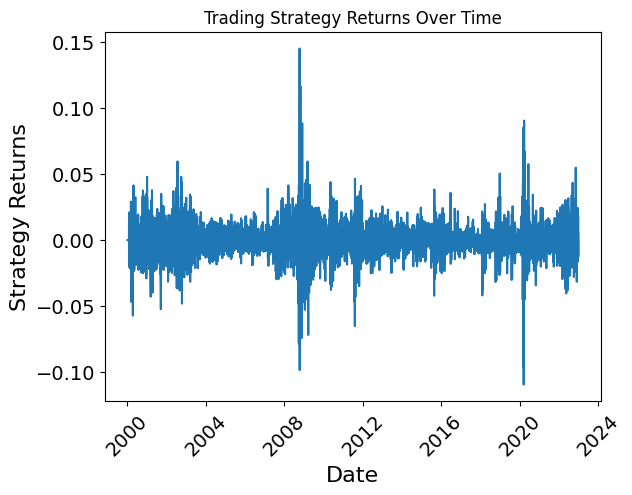

In [82]:
plt.plot(spy3.index,strategy_returns)
plt.xlabel('Date')
plt.ylabel('Strategy Returns')
plt.title('Trading Strategy Returns Over Time')
plt.xticks(rotation=45)  # Rotation des étiquettes d'axe x pour une meilleure lisibilité
plt.show()

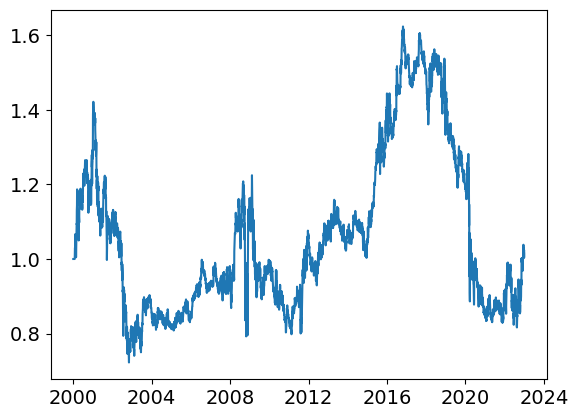

In [83]:
cumulative_pnl = (np.array(1) + strategy_returns).cumprod()
plt.plot(spy3.index, cumulative_pnl)
plt.show()

1.1465880324393096 1.5757575757575757


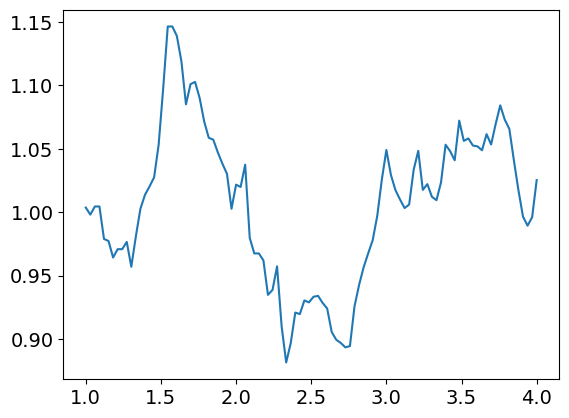

In [105]:
val_k_2 = np.linspace(1,4,100)

resul = []

max_k=0
max_value=0
for nb_std in val_k_2:
    moving_mean = price.rolling(window=window).mean()
    upper_band = moving_mean + nb_std * std
    lower_band = moving_mean - nb_std * std
    signal = bollinger_signal(price, upper_band, lower_band)
    returns = returns_calculation(price)
    strategy_returns = basic_strategy(signal, returns)

    cumulative_pnl3 = (np.array(1) + strategy_returns).cumprod()
    resul.append(cumulative_pnl3.values[-2])
    if cumulative_pnl3.values[-2] > max_value:
        max_value = cumulative_pnl3.values[-2]
        max_k=nb_std

   

plt.plot(val_k_2,resul)
print(max_value, max_k)

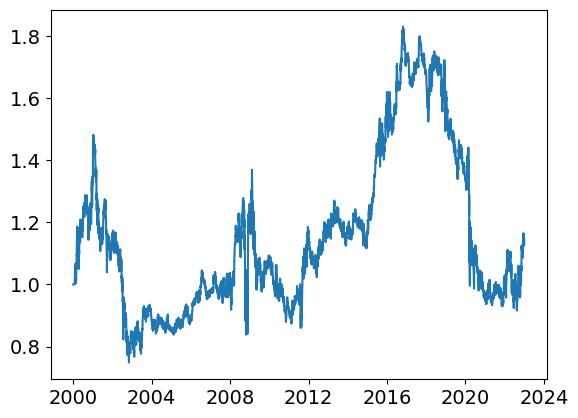

In [107]:
nb_std=max_k
moving_mean = price.rolling(window=window).mean()
upper_band = moving_mean + nb_std * std
lower_band = moving_mean - nb_std * std
signal = bollinger_signal(price, upper_band, lower_band)
returns = returns_calculation(price)
strategy_returns = basic_strategy(signal, returns)
cumulative_pnl3 = (np.array(1) + strategy_returns).cumprod()

plt.plot(spy3.index, cumulative_pnl3)
plt.show()

# Strategy comparison

## Sharpe Ratio

Strategy 1

In [84]:

sharpe_ratio = np.sqrt(252) * spy1['strategy_returns'].mean() / spy1['strategy_returns'].std()
print(sharpe_ratio)

0.037288261390908954


Strategy 2

In [85]:
sharpe_ratio = np.sqrt(252) * spy2['strategy_returns'].mean() / spy2['strategy_returns'].std()
print(sharpe_ratio)

nan


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3744\3638749607.py:1: RuntimeWarning: invalid value encountered in scalar divide
  sharpe_ratio = np.sqrt(252) * spy2['strategy_returns'].mean() / spy2['strategy_returns'].std()


Strategy 3

In [89]:
sharpe_ratio = np.sqrt(252) * strategy_returns.mean() /strategy_returns.std()
print(sharpe_ratio)

0.10276066996066853


While the adding of the volatility improves the Moving average strategy, the strategy based on Bollinger Bands is the most efficient one. However, the sharpe ratio is always lower than 1, which means the return is not sufficient considering the risks taken. 

## Drawdown

Strategy 1

In [90]:
spy1['CumulativeReturns'] = (1 + spy1['strategy_returns']).cumprod()
spy1['CumulativeMax'] = spy1['CumulativeReturns'].cummax()
spy1['Drawdown'] = spy1['CumulativeReturns'] / spy1['CumulativeMax'] -1
max_drawdown = spy1['Drawdown'].min()

print(max_drawdown)

-0.4685666286818052


Strategy 2

In [91]:
spy2['CumulativeReturns'] = (1 + spy2['strategy_returns']).cumprod()
spy2['CumulativeMax'] = spy2['CumulativeReturns'].cummax()
spy2['Drawdown'] = spy2['CumulativeReturns'] / spy2['CumulativeMax'] -1
max_drawdown = spy2['Drawdown'].min()

print(max_drawdown)

0.0


Strategy 3

In [92]:
spy3['CumulativeReturns'] = (1 + strategy_returns).cumprod()
spy3['CumulativeMax'] = spy3['CumulativeReturns'].cummax()
spy3['Drawdown'] = spy3['CumulativeReturns'] / spy3['CumulativeMax'] -1
max_drawdown = spy3['Drawdown'].min()

print(max_drawdown)

-0.49712999140539305


We seek for low values of abs(maxdrawdown). In fact, drawdown is a measure of loss from a peak, so we want small values of this loss to reduce the risks. Thus, the first strategy is the most efficient one in this way, but we can notice that the three values are close.

The sharpe ratio and the max drawdow are metrics that can help us quantify the risk of each strategy. Considering the fact that the three max drawdown values are very close, we can conclude that the less risky strategy is the one using the Bollinger bands (strategy 3)